>   __Praful Gotmare__

> ### <font color=pink>Index of Tasks & Impression</font>

- 1.0 Data Preparation
  - 1.1 Import Library
  - 1.2 Dataset Loading 
  
  <br>
- 2.0 Data Cleaning
  - 2.1 Handling missing values using imputation methods.
  - 2.2 Label Encoding

  <br>
- 3.0 Feature Engineering
  - 3.1 Handling categorical columns by using Label Encoding method
  - 3.2 Handling Outliers

  <br>
- 4.0 Mutual Information
  - 4.1 mutual_info_regression
  - 4.2 mutual_info_classif

  <br>
- 5.0 Feature Scaling
  - 5.1 StandardScaler
  - 5.2 Normalization

  <br>
- 6.0 Feature Selection
  - 6.1 Principal Component Analysis (PCA)

  <br>
- 7.0 Filter Method Feature Selection
  - 7.1 Pearson correlation coefficients
  - 7.2 Using Variance Threshold
  - 7.3 correlation coefficient

  <br>
- 8.0 Feature Importance
  - 8.1 ExtraTreesRegressor
  - 8.2 Correlation Matrix with Heatmap
  - 8.3 Removing unwanted Columns From DataFrame


-----------------------------

### 1.0 Data Preparation

1. Data Collection
2. Cleansing
3. Aggregation
4. Labelling
5. Transformation

Dataset Important Features ::

* Term: The length of the Loan in terms of months.
* LoanStatus: The current status of the loan.
* BorrowerRate: Borrower's Interest Rate on the loan.
* BorrowerState: The state in which the borrower resides.
* EstimatedLoss: Estimated Principal loss.
* ProsperScore: Custom Risk Score
* CreditScoreRange: The upper and lower values of the Credit Score Range.
* ListingCategory: The category of the loan.
* BorrowerState: The state in which the borrower resides.
* Occupation: Borrower's occupation
* EmploymentStatus: Employment status, when listing was created.
* IsBorrowerHomeowner: Does the borrower own a home ?
* OriginalLoanAmount: The amount of the loan which was issued.
* MonthlyPayment: The monthly installment that is to be paid.
* LoanOriginationDate: The date at which the loan was issued.
* StatedMonthlyIncome: The monthly income of the borrower stated at the time the loan was issued.

-----------------------------

#### 1.1 Import Library

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#import warnings
import warnings
warnings.filterwarnings('ignore')

#### 1.2 Dataset Loading

In [163]:
# Dataset of ProsperLoan csv file reading

df = pd.read_csv("prosperLoanData.csv")

In [164]:
# checking data only head of 5 rows
df.head()

ListingKey  ListingNumber ListingCreationDate CreditGrade  \
0  1021339766868145413AB3B         193129             09:29.3           C   
1  10273602499503308B223C1        1209647             28:07.9         NaN   
2  0EE9337825851032864889A          81716             00:47.1          HR   
3  0EF5356002482715299901A         658116             02:35.0         NaN   
4  0F023589499656230C5E3E2         909464             38:39.1         NaN   

   Term LoanStatus       ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  \
0    36  Completed   8/14/2009 0:00      0.16516        0.1580       0.1380   
1    36    Current              NaN      0.12016        0.0920       0.0820   
2    36  Completed  12/17/2009 0:00      0.28269        0.2750       0.2400   
3    36    Current              NaN      0.12528        0.0974       0.0874   
4    36    Current              NaN      0.24614        0.2085       0.1985   

   EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0                      NaN            NaN              NaN   
1                  0.07960         0.0249          0.05470   
2                      NaN            NaN              NaN   
3                  0.08490         0.0249          0.06000   
4                  0.18316         0.0925          0.09066   

   ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  \
0                      NaN                   NaN           NaN   
1                      6.0                     A           7.0   
2                      NaN                   NaN           NaN   
3                      6.0                     A           9.0   
4                      3.0                     D           4.0   

   ListingCategory (numeric) BorrowerState     Occupation EmploymentStatus  \
0                          0            CO          Other    Self-employed   
1                          2            CO   Professional         Employed   
2                          0            GA          Other    Not available   
3                         16            GA  Skilled Labor         Employed   
4                          2            MN      Executive         Employed   

   EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup  \
0                       2.0                 True              True   
1                      44.0                False             False   
2                       NaN                False              True   
3                     113.0                 True             False   
4                      44.0                 True             False   

                  GroupKey  DateCreditPulled  CreditScoreRangeLower  \
0                      NaN           41:46.8                  640.0   
1                      NaN    2/27/2014 8:28                  680.0   
2  783C3371218786870A73D20           09:10.1                  480.0   
3                      NaN  10/22/2012 11:02                  800.0   
4                      NaN   9/14/2013 18:38                  680.0   

   CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  \
0                  659.0         10/11/2001 0:00                 5.0   
1                  699.0          3/18/1996 0:00                14.0   
2                  499.0          7/27/2002 0:00                 NaN   
3                  819.0          2/28/1983 0:00                 5.0   
4                  699.0          2/20/2004 0:00                19.0   

   OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
0              4.0                        12.0                      1   
1             14.0                        29.0                     13   
2              NaN                         3.0                      0   
3              5.0                        29.0                      7   
4             19.0                        49.0                      6   

   OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
0                           24                 

In [4]:
# detecting data quality issues by using pandas_dq
# 𝐩𝐚𝐧𝐝𝐚𝐬_𝐝𝐪 is a relatively new library, focussing on detecting data quality issues and fixing them automatically like:

# - Highly correlated Features
# - Zero-Variance Columns
# - Skewed Distributions
# - Rare Categories



# from pandas_dq import dq_report, Fix_DQ

# df_filter = pd.read_csv("prosperLoanData.csv")
# dq_report(df_filter, verbose=1)
# fdq= Fix_DQ()  # fixing issues
# data_transformed =fdq.fit_transform(df_filter)

In [165]:
# Checking shape of Dataset
df.shape

(113937, 81)

In [166]:
# Checking information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [167]:
# Checking columns of Dataframe
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [168]:
# so we can observed about certain statistics of each column 
# descriptive statistics for numeric variables

df.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
count             84853.000000  84853.000000              113937.000000   
mean                  4.072243      5.950067                   2.774209   
std                   1.673227      2.376501                   3.996797   
min                   1.000000      1.000000                   0.000000   
25%                   3.000000      4.000000                   1.000000   
50%                   4.000000      6.000000                   1.000000   
75%                   5.000000      8.000000                   3.000000   
max                   7.000000     11.000000                  20.000000   

       EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
count             106312.000000          113346.000000          113346.000000   
mean                  96.071582             685.567731             704.567731   
std                   94.480605              66.458275              66.458275   
min                    0.000000               0.000000              19.000000   
25%                   26.000000             660.000000             679.000000   
50%                   67.000000             680.000000             699.000000   
75%                  137.000000             720.000000             739.000000   
max                  755.000000             880.000000             899.000000   

       CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
count       106333.000000    106333.000000               113240.000000   
mean            10.317192         9.260164                   26.754539   
std              5.457866         5.022644                   13.637871   
min              0.000000         0.000000                    2.000000   
25%              7.000000         6.000000                   17.000000   
50%             10.000000         9.000000                   25.000000   
75%             13.000000        12.000000                   35.000000   
max             59.000000        54.000000                  136.000000   

       OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  \
count           113937.00000                113937.000000   
mean                 6.96979                   398.292161   
std                  4.63097                   447.159711   
min                  0.00000                     0.000000   
25%                  4.00000                   114.000000   
50%                  6.00000                   271.000000   
75%                  9.00000                   525.000000   
max                 51.00000                 14985.000000   

       InquiriesLast6Months  Tot

##### Observation about Dataset :
    - So in this dataset there are "113937" Loans in the dataset and total "81" features/columns present in dataset.
    - and in this dataset most of the variables are "numeric" as well as "Categorical" Form. 

##### So as per my analysis we can make Dataset columns can be seperated or split into two categories like :
    >Borrower Column
    >Loan Performance Column

In [9]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df)
# profile

In [169]:
# checking if in dataframe is any duplicate value contain or not
df.duplicated().sum()

0

In [170]:
#checking missing value in dataframe

df.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [171]:
# Checkingin dataframe that total numbers of null values present 

print(df.isnull().values.sum())

1364086


### -------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 2.0 Data Cleaning

### 2.1 Handling missing values using imputation methods.
#### like Mean,Median and Mode

In [172]:
# missing values in decsending order
print("Missing Values:\n")
print(df.isnull().sum().sort_values(ascending=False),"\n\n",df.isnull().sum()/df.shape[0] *100,"\n\n")

Missing Values:

GroupKey                               100596
LoanFirstDefaultedCycleNumber           96985
ScorexChangeAtTimeOfListing             95009
ProsperPrincipalOutstanding             91852
ProsperPrincipalBorrowed                91852
ProsperPaymentsOneMonthPlusLate         91852
ProsperPaymentsLessThanOneMonthLate     91852
OnTimeProsperPayments                   91852
TotalProsperLoans                       91852
TotalProsperPaymentsBilled              91852
CreditGrade                             84984
ClosedDate                              58848
ProsperRating (Alpha)                   29084
ProsperScore                            29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
EstimatedLoss                           29084
EstimatedEffectiveYield                 29084
DebtToIncomeRatio                        8554
EmploymentStatusDuration                 7625
AmountDelinquent                         7622
CurrentCreditLine

In [173]:
# checking Null values for all features

df[df.columns[df.isnull().any()]]

CreditGrade       ClosedDate  BorrowerAPR  EstimatedEffectiveYield  \
0                C   8/14/2009 0:00      0.16516                      NaN   
1              NaN              NaN      0.12016                  0.07960   
2               HR  12/17/2009 0:00      0.28269                      NaN   
3              NaN              NaN      0.12528                  0.08490   
4              NaN              NaN      0.24614                  0.18316   
...            ...              ...          ...                      ...   
113932         NaN              NaN      0.22354                  0.16490   
113933         NaN              NaN      0.13220                  0.10070   
113934         NaN              NaN      0.23984                  0.18828   
113935         NaN   8/13/2013 0:00      0.28408                  0.24450   
113936         NaN              NaN      0.13189                  0.09071   

        EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  \
0                 NaN              NaN                      NaN   
1              0.0249          0.05470                      6.0   
2                 NaN              NaN                      NaN   
3              0.0249          0.06000                      6.0   
4              0.0925          0.09066                      3.0   
...               ...              ...                      ...   
113932         0.0699          0.09500                      4.0   
113933         0.0200          0.08070                      6.0   
113934         0.1025          0.08578                      3.0   
113935         0.0850          0.15950                      4.0   
113936         0.0299          0.06081                      6.0   

       ProsperRating (Alpha)  ProsperScore BorrowerState  \
0                        NaN           NaN            CO   
1                          A           7.0            CO   
2                        NaN           NaN            GA   
3                          A           9.0            GA   
4                          D           4.0            MN   
...                      ...           ...           ...   
113932                     C           5.0            IL   
113933                     A           8.0            PA   
113934                     D           3.0            TX   
113935                     C           5.0            GA   
113936                     A           7.0            NY   

                     Occupation EmploymentStatus  EmploymentStatusDuration  \
0                         Other    Self-employed                       2.0   
1                  Professional         Employed                      44.0   
2                         Other    Not available                       NaN   
3                 Skilled Labor         Employed                     113.0   
4                     Executive         Employed                      44.0   
...                         ...              ...                       ...   
113932  Food Service Management         Employed                     246.0   
113933             Professional         Employed                      21.0   
113934                    Other         Employed                      84.0   
113935             Food Service        Full-time                      94.0   
113936                Professor         Employed                     244.0   

                       GroupKey  CreditScoreRangeLower  CreditScoreRangeUpper  \
0                           NaN                  640.0                  659.0   
1                           NaN                  680.0                  699.0   
2       783C3371218786870A73D20                  480.0                  499.0   
3                           NaN                  800.0                  819.0   
4                           NaN                  680.0                  699.0   
...                         ...                    ...                    ...   
113932                      NaN                  700

In [174]:
# For 'OpenCreditLines' checking null values 

df["OpenCreditLines"].isnull().sum()

7604

In [175]:
# For 'TradesOpenedLast6Months' checking values counts

df["TradesOpenedLast6Months"].value_counts()

0.0     54249
1.0     31475
2.0     13180
3.0      4678
4.0      1646
5.0       652
6.0       273
7.0       116
8.0        54
9.0        24
10.0       13
11.0       12
12.0        8
13.0        5
17.0        2
14.0        2
15.0        2
16.0        1
20.0        1
Name: TradesOpenedLast6Months, dtype: int64

In [176]:
# now we are having the only categorical columns that contains datatype of "object" so writing code for that

categorical_columns =[]
for column in df.columns:
    if df[column].dtype== 'object':
        categorical_columns.append(column)
categorical_columns        

['ListingKey',
 'ListingCreationDate',
 'CreditGrade',
 'LoanStatus',
 'ClosedDate',
 'ProsperRating (Alpha)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'GroupKey',
 'DateCreditPulled',
 'FirstRecordedCreditLine',
 'IncomeRange',
 'LoanKey',
 'LoanOriginationDate',
 'LoanOriginationQuarter',
 'MemberKey']

In [177]:
#now remaining columns that we want only numerical columns so we are excluding the  "object" datatype so it will give only coluns that contain numerical rows

numerical_columns = df.select_dtypes(exclude=["object"]).columns.tolist()
numerical_columns

['ListingNumber',
 'Term',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (percentage)',
 'TradesOpenedLast6Months',
 'DebtToIncomeRatio',
 'IncomeVerifiable',
 'StatedMonthlyIncome',
 'TotalProsperLoans',
 'TotalProsperPaymentsBilled',
 'OnTimeProsperPayments',
 'ProsperPaymentsLessThanOneMonthLate',


In [178]:
#  handling missing values for all categorical features using "Mode" method


categ_col =['ListingKey','ListingCreationDate','CreditGrade','LoanStatus','ClosedDate','ProsperRating (Alpha)',
           'BorrowerState','Occupation','EmploymentStatus','GroupKey','DateCreditPulled','FirstRecordedCreditLine',
           'IncomeRange','LoanKey','LoanOriginationDate','LoanOriginationQuarter','MemberKey']


for i in categ_col:
    df[i].fillna(df[i].mode()[0],inplace=True)
    print (i)


ListingKey
ListingCreationDate
CreditGrade
LoanStatus
ClosedDate
ProsperRating (Alpha)
BorrowerState
Occupation
EmploymentStatus
GroupKey
DateCreditPulled
FirstRecordedCreditLine
IncomeRange
LoanKey
LoanOriginationDate
LoanOriginationQuarter
MemberKey


In [179]:
# cleaned the categorical feature

df["CreditGrade"].isnull().sum()

0

In [182]:
#  handling missing values for all numerical features using "Mean" method


cols = ['ListingNumber','Term','BorrowerAPR','BorrowerRate','LenderYield','EstimatedEffectiveYield','EstimatedLoss',
 'EstimatedReturn','ProsperRating (numeric)','ProsperScore','ListingCategory (numeric)','EmploymentStatusDuration',
 'IsBorrowerHomeowner','CurrentlyInGroup','CreditScoreRangeLower','CreditScoreRangeUpper','CurrentCreditLines',
 'OpenCreditLines','TotalCreditLinespast7years','OpenRevolvingAccounts','OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months','TotalInquiries','CurrentDelinquencies','AmountDelinquent','DelinquenciesLast7Years',
 'PublicRecordsLast10Years','PublicRecordsLast12Months','RevolvingCreditBalance','BankcardUtilization',
 'AvailableBankcardCredit','TotalTrades','TradesNeverDelinquent (percentage)','TradesOpenedLast6Months',
 'DebtToIncomeRatio','IncomeVerifiable','StatedMonthlyIncome','TotalProsperLoans','TotalProsperPaymentsBilled',
 'OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate',
 'ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanCurrentDaysDelinquent',
 'LoanFirstDefaultedCycleNumber','LoanMonthsSinceOrigination','LoanNumber','LoanOriginalAmount',
 'MonthlyLoanPayment','LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_InterestandFees',
 'LP_ServiceFees','LP_CollectionFees','LP_GrossPrincipalLoss',
 'LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments','PercentFunded','Recommendations','InvestmentFromFriendsCount',
 'InvestmentFromFriendsAmount','Investors']


for i in cols:
    df[i].fillna(df[i].mean(), inplace=True)
    print(i)

ListingNumber
Term
BorrowerAPR
BorrowerRate
LenderYield
EstimatedEffectiveYield
EstimatedLoss
EstimatedReturn
ProsperRating (numeric)
ProsperScore
ListingCategory (numeric)
EmploymentStatusDuration
IsBorrowerHomeowner
CurrentlyInGroup
CreditScoreRangeLower
CreditScoreRangeUpper
CurrentCreditLines
OpenCreditLines
TotalCreditLinespast7years
OpenRevolvingAccounts
OpenRevolvingMonthlyPayment
InquiriesLast6Months
TotalInquiries
CurrentDelinquencies
AmountDelinquent
DelinquenciesLast7Years
PublicRecordsLast10Years
PublicRecordsLast12Months
RevolvingCreditBalance
BankcardUtilization
AvailableBankcardCredit
TotalTrades
TradesNeverDelinquent (percentage)
TradesOpenedLast6Months
DebtToIncomeRatio
IncomeVerifiable
StatedMonthlyIncome
TotalProsperLoans
TotalProsperPaymentsBilled
OnTimeProsperPayments
ProsperPaymentsLessThanOneMonthLate
ProsperPaymentsOneMonthPlusLate
ProsperPrincipalBorrowed
ProsperPrincipalOutstanding
ScorexChangeAtTimeOfListing
LoanCurrentDaysDelinquent
LoanFirstDefaultedCycleNu

In [183]:
# cleaned the numerical feature

df["BorrowerRate"].isnull().sum()

0

#### How many missing data in the data set?

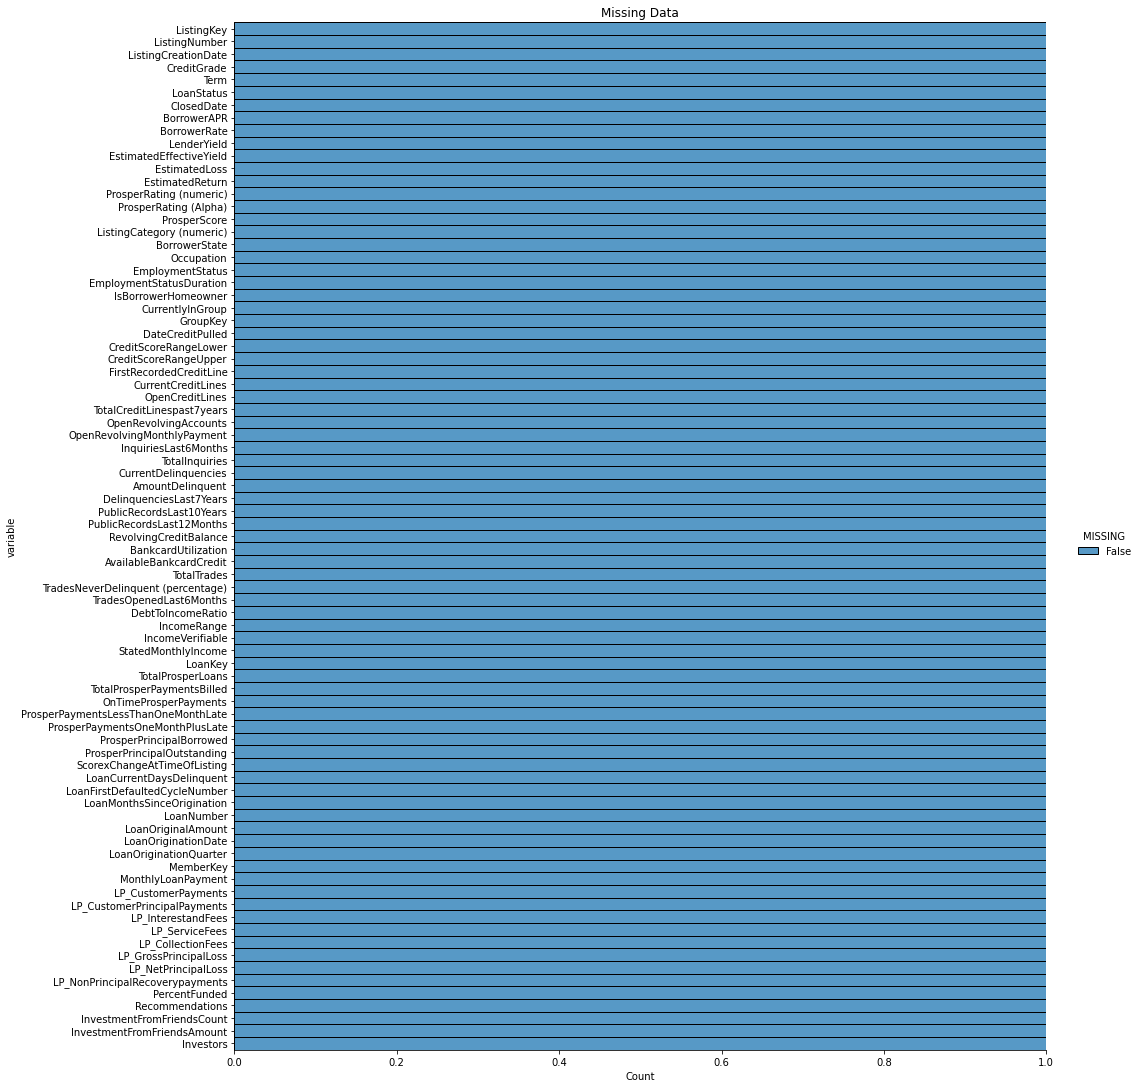

In [184]:
# Checking Missing Values in Dataframe using Displot Graph 
# in result we are seeing that "False" that means there are no missing values in dataframe 

from ipywidgets import widgets

sns.displot(
    data=df.isna().melt(value_name="MISSING"),
    y="variable",
    hue="MISSING",
    multiple="fill",
    aspect=1,
    height=15
);
plt.title('Missing Data');

### 2.2 Label Encoding
#### For Categorical Columns

In [185]:
# Performing Label Encoding to selected features

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

encoding_column = ['ListingKey','ListingCreationDate','ClosedDate','ProsperRating (Alpha)',
           'BorrowerState','Occupation','EmploymentStatus','GroupKey','DateCreditPulled','FirstRecordedCreditLine',
           'IncomeRange','LoanKey','LoanOriginationDate','LoanOriginationQuarter','MemberKey']


#  label encoding of multiple features at once

df[encoding_column] = df[encoding_column].apply(LabelEncoder().fit_transform)
df.head()

ListingKey  ListingNumber  ListingCreationDate CreditGrade  Term  \
0        7179         193129                 5434           C    36   
1        7191        1209647                16275           C    36   
2        6491          81716                  451          HR    36   
3        6513         658116                 1486           C    36   
4        6530         909464                22357           C    36   

  LoanStatus  ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  \
0  Completed        2382      0.16516        0.1580       0.1380   
1    Current        1399      0.12016        0.0920       0.0820   
2  Completed         800      0.28269        0.2750       0.2400   
3    Current        1399      0.12528        0.0974       0.0874   
4    Current        1399      0.24614        0.2085       0.1985   

   EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0                 0.168661       0.080306         0.096068   
1                 0.079600       0.024900         0.054700   
2                 0.168661       0.080306         0.096068   
3                 0.084900       0.024900         0.060000   
4                 0.183160       0.092500         0.090660   

   ProsperRating (numeric)  ProsperRating (Alpha)  ProsperScore  \
0                 4.072243                      3      5.950067   
1                 6.000000                      0      7.000000   
2                 4.072243                      3      5.950067   
3                 6.000000                      0      9.000000   
4                 3.000000                      4      4.000000   

   ListingCategory (numeric)  BorrowerState  Occupation  EmploymentStatus  \
0                          0              5          35                 7   
1                          2              5          41                 0   
2                          0             10          35                 2   
3                         16             10          50                 0   
4                          2             23          19                 0   

   EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup  GroupKey  \
0                  2.000000                 True              True       333   
1                 44.000000                False             False       333   
2                 96.071582                False              True       333   
3                113.000000                 True             False       333   
4                 44.000000                 True             False       333   

   DateCreditPulled  CreditScoreRangeLower  CreditScoreRangeUpper  \
0             63351                  640.0                  659.0   
1             43905                  680.0                  699.0   
2              2975                  480.0                  499.0   
3             15398                  800.0                  819.0   
4             94319                  680.0                  699.0   

   FirstRecordedCreditLine  CurrentCreditLines  OpenCreditLines  \
0                     1070            5.000000         4.000000   
1                     5082           14.000000        14.000000   
2                     9269           10.317192         9.260164   
3                     4504            5.000000         5.000000   
4                     4273           19.000000        19.000000   

   TotalCreditLinespast7years  OpenRevolvingAccounts  \
0                        12.0                      1   
1                        29.0                     13   
2                         3.0                      0   
3                        29.0                      7   
4                        49.0                      6   

   OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
0                           24                   3.0             3.0   
1                          389                   3.0             5.0   
2                            0                   0.0             1.0   
3   

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  int32  
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  int32  
 3   CreditGrade                          113937 non-null  object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           113937 non-null  int32  
 7   BorrowerAPR                          113937 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              113937 non-null  float64
 11  EstimatedLoss

In [187]:
df.isnull().sum()

ListingKey                             0
ListingNumber                          0
ListingCreationDate                    0
CreditGrade                            0
Term                                   0
LoanStatus                             0
ClosedDate                             0
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperRating (Alpha)                  0
ProsperScore                           0
ListingCategory (numeric)              0
BorrowerState                          0
Occupation                             0
EmploymentStatus                       0
EmploymentStatusDuration               0
IsBorrowerHomeowner                    0
CurrentlyInGroup                       0
GroupKey                               0
DateCreditPulled

### Removing all the features which have more than 55% missing values

In [188]:
missing_cols = ['GroupKey','TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments',
            'ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed',
            'ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber']
missing_cols

['GroupKey',
 'TotalProsperLoans',
 'TotalProsperPaymentsBilled',
 'OnTimeProsperPayments',
 'ProsperPaymentsLessThanOneMonthLate',
 'ProsperPaymentsOneMonthPlusLate',
 'ProsperPrincipalBorrowed',
 'ProsperPrincipalOutstanding',
 'ScorexChangeAtTimeOfListing',
 'LoanFirstDefaultedCycleNumber']

In [189]:
# droping missing values columns

df.drop(missing_cols, axis=1, inplace=True)

In [190]:
# Removing any duplicate columns that may exist

df.drop_duplicates(inplace=True)

In [192]:
# checking duplicates

df.duplicated().sum()

0

In [193]:
df.isnull().sum()

ListingKey                            0
ListingNumber                         0
ListingCreationDate                   0
CreditGrade                           0
Term                                  0
LoanStatus                            0
ClosedDate                            0
BorrowerAPR                           0
BorrowerRate                          0
LenderYield                           0
EstimatedEffectiveYield               0
EstimatedLoss                         0
EstimatedReturn                       0
ProsperRating (numeric)               0
ProsperRating (Alpha)                 0
ProsperScore                          0
ListingCategory (numeric)             0
BorrowerState                         0
Occupation                            0
EmploymentStatus                      0
EmploymentStatusDuration              0
IsBorrowerHomeowner                   0
CurrentlyInGroup                      0
DateCreditPulled                      0
CreditScoreRangeLower                 0


In [194]:
df.shape

(113937, 71)

In [195]:
# let's find the counts of each status categories 

df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [199]:
# filtering out Current Status records

df_filter =df[df.LoanStatus != 'Current']
df_filter

ListingKey  ListingNumber  ListingCreationDate CreditGrade  Term  \
0             7179         193129                 5434           C    36   
2             6491          81716                  451          HR    36   
11            6564         213551                16522           C    36   
12            6575        1081604                  678           C    36   
15            6656         577164                 8584           C    36   
...            ...            ...                  ...         ...   ...   
113927      100267         322787                14653          AA    36   
113928      100278         510097                 1574           C    36   
113929      100298         830413                23171           C    36   
113933      101824         537216                24841           C    36   
113935      101850         539056                10696           C    60   

                    LoanStatus  ClosedDate  BorrowerAPR  BorrowerRate  \
0                    Completed        2382      0.16516        0.1580   
2                    Completed         800      0.28269        0.2750   
11                   Completed         229      0.15033        0.1325   
12        Past Due (1-15 days)        1399      0.17969        0.1435   
15                   Defaulted         819      0.35797        0.3177   
...                        ...         ...          ...           ...   
113927               Completed        1886      0.07469        0.0679   
113928               Completed        2657      0.22362        0.1899   
113929               Completed        1191      0.30285        0.2639   
113933  FinalPaymentInProgress        1399      0.13220        0.1110   
113935               Completed        2378      0.28408        0.2605   

        LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0            0.1380                 0.168661       0.080306         0.096068   
2            0.2400                 0.168661       0.080306         0.096068   
11           0.1225                 0.168661       0.080306         0.096068   
12           0.1335                 0.126400       0.052400         0.074000   
15           0.3077                 0.289600       0.165000         0.124600   
...             ...                      ...            ...              ...   
113927       0.0579                 0.168661       0.080306         0.096068   
113928       0.1799                 0.175700       0.061000         0.114700   
113929       0.2539                 0.231800       0.122500         0.109300   
113933       0.1010                 0.100700       0.020000         0.080700   
113935       0.2505                 0.244500       0.085000         0.159500   

        ProsperRating (numeric)  ProsperRating (Alpha)  ProsperScore  \
0                      4.072243                      3      5.950067   
2                      4.072243                      3      5.950067   
11                     4.072243                      3      5.950067   
12                     5.000000                      2      4.000000   
15                     1.000000                      6      5.000000   
...                         ...                    ...           ...   
113927                 4.072243                      3      5.950067   
113928                 4.000000                      3      6.000000   
113929                 2.000000                      5      3.000000   
113933                 6.000000                      0      8.000000   
113935                 4.000000                      3      5.000000   

        ListingCategory (numeric)  BorrowerState  Occupation  \
0                               0              5          35   
2                               0             10          35   
11                              0              4          66   
12                              1              1          48   
15                             13              9          35   
...     

In [200]:
df_filter['LoanStatus'].value_counts()

Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [201]:
df_filter['LoanStatus'] = df_filter['ClosedDate'].apply(lambda x: 1 if not pd.isnull(x) else 0)

In [202]:
df_filter['LoanStatus'].value_counts()

1    57361
Name: LoanStatus, dtype: int64

In [204]:
df_filter['LoanCurrentDaysDelinquent'].value_counts()

0       38284
121       293
10        192
4          77
11         62
        ...  
582         1
1099        1
2555        1
787         1
1081        1
Name: LoanCurrentDaysDelinquent, Length: 2411, dtype: int64

In [205]:
df_filter['LoanStatus'] = df_filter['LoanCurrentDaysDelinquent'].apply(lambda x:1 if x > 180 else 0)


In [206]:
df_filter['LoanStatus'].value_counts()

0    42298
1    15063
Name: LoanStatus, dtype: int64

In [207]:
# drop columns that has been renamed

df_filter.drop(['LoanCurrentDaysDelinquent','ClosedDate'], axis=1,inplace=True)

In [208]:
df_filter

ListingKey  ListingNumber  ListingCreationDate CreditGrade  Term  \
0             7179         193129                 5434           C    36   
2             6491          81716                  451          HR    36   
11            6564         213551                16522           C    36   
12            6575        1081604                  678           C    36   
15            6656         577164                 8584           C    36   
...            ...            ...                  ...         ...   ...   
113927      100267         322787                14653          AA    36   
113928      100278         510097                 1574           C    36   
113929      100298         830413                23171           C    36   
113933      101824         537216                24841           C    36   
113935      101850         539056                10696           C    60   

        LoanStatus  BorrowerAPR  BorrowerRate  LenderYield  \
0                0      0.16516        0.1580       0.1380   
2                0      0.28269        0.2750       0.2400   
11               0      0.15033        0.1325       0.1225   
12               0      0.17969        0.1435       0.1335   
15               0      0.35797        0.3177       0.3077   
...            ...          ...           ...          ...   
113927           0      0.07469        0.0679       0.0579   
113928           0      0.22362        0.1899       0.1799   
113929           0      0.30285        0.2639       0.2539   
113933           0      0.13220        0.1110       0.1010   
113935           0      0.28408        0.2605       0.2505   

        EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0                      0.168661       0.080306         0.096068   
2                      0.168661       0.080306         0.096068   
11                     0.168661       0.080306         0.096068   
12                     0.126400       0.052400         0.074000   
15                     0.289600       0.165000         0.124600   
...                         ...            ...              ...   
113927                 0.168661       0.080306         0.096068   
113928                 0.175700       0.061000         0.114700   
113929                 0.231800       0.122500         0.109300   
113933                 0.100700       0.020000         0.080700   
113935                 0.244500       0.085000         0.159500   

        ProsperRating (numeric)  ProsperRating (Alpha)  ProsperScore  \
0                      4.072243                      3      5.950067   
2                      4.072243                      3      5.950067   
11                     4.072243                      3      5.950067   
12                     5.000000                      2      4.000000   
15                     1.000000                      6      5.000000   
...                         ...                    ...           ...   
113927                 4.072243                      3      5.950067   
113928                 4.000000                      3      6.000000   
113929                 2.000000                      5      3.000000   
113933                 6.000000                      0      8.000000   
113935                 4.000000                      3      5.000000   

        ListingCategory (numeric)  BorrowerState  Occupation  \
0                               0              5          35   
2                               0             10          35   
11                              0              4          66   
12                              1              1          48   
15                             13              9          35   
...                           ...            ...         ...   
113927                          4             47          19   
113928                          3              5          35   
113929                          2              9           0   
113933                          7       

In [209]:
# Print number of Categorical and Numerical columns

print("Categorical columns: ",len(df_filter.select_dtypes(include=['object']).columns))
print("Numerical columns: ",len(df_filter.select_dtypes(exclude=['object']).columns))

Categorical columns:  1
Numerical columns:  68


In [210]:
from sklearn.impute import SimpleImputer
categ_cols = [col for col in df_filter.columns if df_filter[col].dtype == 'object']

# Impute missing values with mode
for col in categ_cols:
    imputer = SimpleImputer(strategy='most_frequent')
    df_filter[col] = imputer.fit_transform(df_filter[[col]])

# Verify missing values are imputed
df_filter.isnull().sum()

ListingKey                            0
ListingNumber                         0
ListingCreationDate                   0
CreditGrade                           0
Term                                  0
LoanStatus                            0
BorrowerAPR                           0
BorrowerRate                          0
LenderYield                           0
EstimatedEffectiveYield               0
EstimatedLoss                         0
EstimatedReturn                       0
ProsperRating (numeric)               0
ProsperRating (Alpha)                 0
ProsperScore                          0
ListingCategory (numeric)             0
BorrowerState                         0
Occupation                            0
EmploymentStatus                      0
EmploymentStatusDuration              0
IsBorrowerHomeowner                   0
CurrentlyInGroup                      0
DateCreditPulled                      0
CreditScoreRangeLower                 0
CreditScoreRangeUpper                 0


In [211]:
df_filter.isnull().sum()/(len(df_filter))*100

ListingKey                            0.0
ListingNumber                         0.0
ListingCreationDate                   0.0
CreditGrade                           0.0
Term                                  0.0
LoanStatus                            0.0
BorrowerAPR                           0.0
BorrowerRate                          0.0
LenderYield                           0.0
EstimatedEffectiveYield               0.0
EstimatedLoss                         0.0
EstimatedReturn                       0.0
ProsperRating (numeric)               0.0
ProsperRating (Alpha)                 0.0
ProsperScore                          0.0
ListingCategory (numeric)             0.0
BorrowerState                         0.0
Occupation                            0.0
EmploymentStatus                      0.0
EmploymentStatusDuration              0.0
IsBorrowerHomeowner                   0.0
CurrentlyInGroup                      0.0
DateCreditPulled                      0.0
CreditScoreRangeLower             

In [212]:
df_filter.shape

(57361, 69)

In [222]:
# Drop the columns that are not required for analysis
# df_filter.drop(columns=["ListingKey","ListingNumber", "LoanKey","MemberKey", "LoanNumber", ], inplace=True)*
print(df_filter.shape)

(57361, 64)


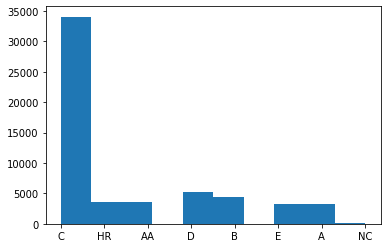

In [223]:
# create a histogram representing percentage of each Credit Grade in Credit Grade column
plt.hist(df_filter["CreditGrade"])
plt.show()

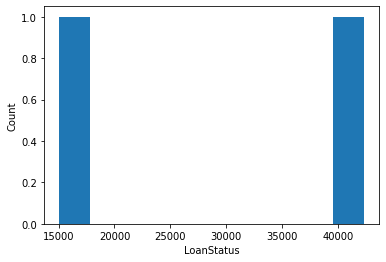

In [224]:
# univariate relationship of Loan Status
df_filter['LoanStatus'].value_counts().plot(kind='hist')
plt.xlabel('LoanStatus')
plt.ylabel('Count')
plt.show()

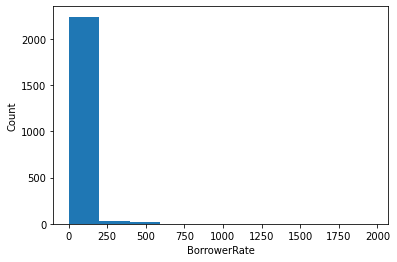

In [225]:
# the univariate relationship of Borrower rate
df_filter['BorrowerRate'].value_counts().plot(kind='hist')
plt.xlabel('BorrowerRate')
plt.ylabel('Count')
plt.show()

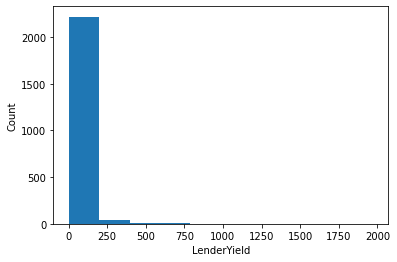

In [226]:
#univariate relationship of Lender Yield on Loan
df_filter['LenderYield'].value_counts().plot(kind='hist')
plt.xlabel('LenderYield')
plt.ylabel('Count')
plt.show()

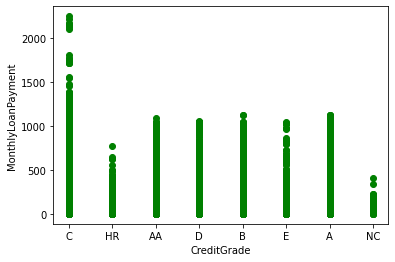

In [227]:
CreditGrade=df_filter['CreditGrade'].astype(str)
MonthlyLoanPayment=df_filter['MonthlyLoanPayment']
plt.scatter(CreditGrade, MonthlyLoanPayment,color = "green")
plt.xlabel("CreditGrade")
plt.ylabel("MonthlyLoanPayment")
plt.show()

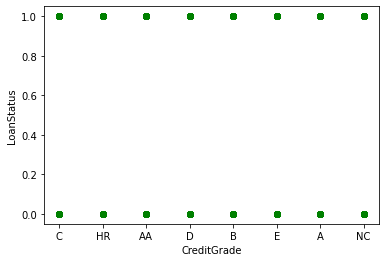

In [228]:
 # Bivariate Relatonship between CreditGrade and LoanStatus
CreditGrade=df_filter['CreditGrade'].astype(str)
LoanStatus=df_filter['LoanStatus']
plt.scatter(CreditGrade, LoanStatus,color = "green")
plt.xlabel("CreditGrade")
plt.ylabel("LoanStatus")
plt.show()

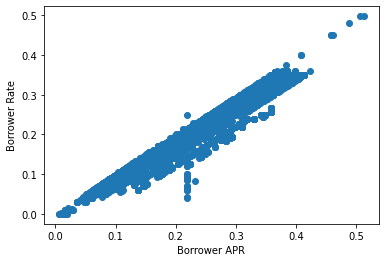

In [229]:
# Scatter Plot between BorrowerAPR and BorrowerRate
plt.scatter(df_filter['BorrowerAPR'], df_filter['BorrowerRate'])
plt.ylabel('Borrower Rate')
plt.xlabel('Borrower APR')
plt.show()

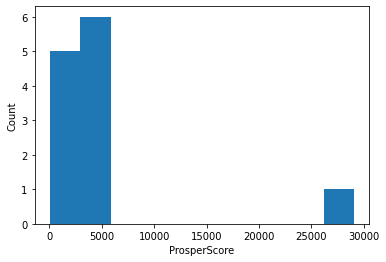

In [230]:
#univariate relationship of Lender Yield on Loan
df_filter['ProsperScore'].value_counts().plot(kind='hist')
plt.xlabel('ProsperScore')
plt.ylabel('Count')
plt.show()

In [231]:
df_filter = df_filter[df_filter["ProsperScore"]!=11]

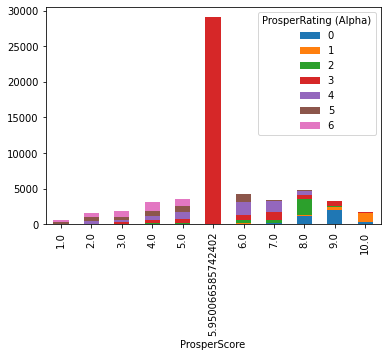

In [232]:
# ProsperScore vs ProsperRating (Alpha) 
pd.crosstab(df_filter["ProsperScore"],df_filter["ProsperRating (Alpha)"]).plot(kind="bar",stacked=True)
plt.show()

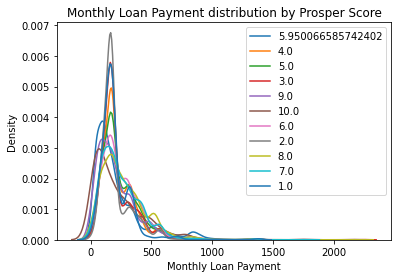

In [233]:
# Bivariate analysis between ProsperScore and MonthlyLoanPayment

for i in df_filter["ProsperScore"].unique():
    sns.kdeplot(df_filter["MonthlyLoanPayment"][df_filter["ProsperScore"]==i],label=i)

plt.xlabel("Monthly Loan Payment")
plt.ylabel("Density")
plt.title("Monthly Loan Payment distribution by Prosper Score")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Current Delinquency distribution by Credit Grade')

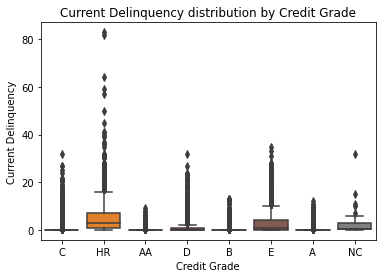

In [234]:
sns.boxplot(x='CreditGrade', y='CurrentDelinquencies', data=df_filter)
plt.xlabel('Credit Grade')
plt.ylabel('Current Delinquency')
plt.title('Current Delinquency distribution by Credit Grade')

#### Distribution of Loan Status

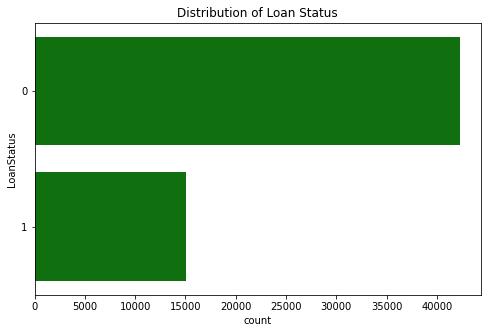

In [235]:
# Creating a function that creates a bar chart for a univariate categorical variablet avoid creating repetitive barchart codes.

def barchart(i):
    color=sns.color_palette()[0]
    sb.countplot(data = df_filter, x= i, color=color);
def barcharty(i):
    color=sns.color_palette()[0]
    sb.countplot(data = df_filter, y= i, color=color);
    
# Create a bar chart for the Loan Status
plt.figure(figsize=[8,5])
order = df_filter.LoanStatus.value_counts().index
sns.countplot(data= df_filter, y = 'LoanStatus', order=order, color='green')
plt.title('Distribution of Loan Status');

Effect of MonthlyLoanPayment & LoanOriginalAmount on LoanStatus

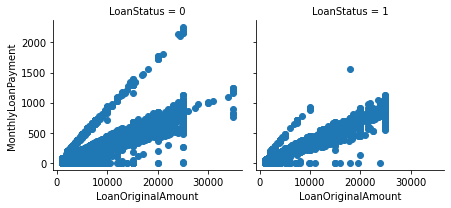

In [236]:
#Creating a facet grid for multivariate variables of loanStatus, MonthlyLoanPayment & LoanOriginalAmount

f = sns.FacetGrid(data=df_filter, col='LoanStatus', col_wrap=4)                #creating four columns using LoanStatus per column
f.map(plt.scatter, 'LoanOriginalAmount', 'MonthlyLoanPayment')           #scatter plot

### <------------------------------------------------------------------------------------------------------------------------------------------------------->

# Task - 2

#### Question 1 : What are the most number of borrowers Credit Grade?

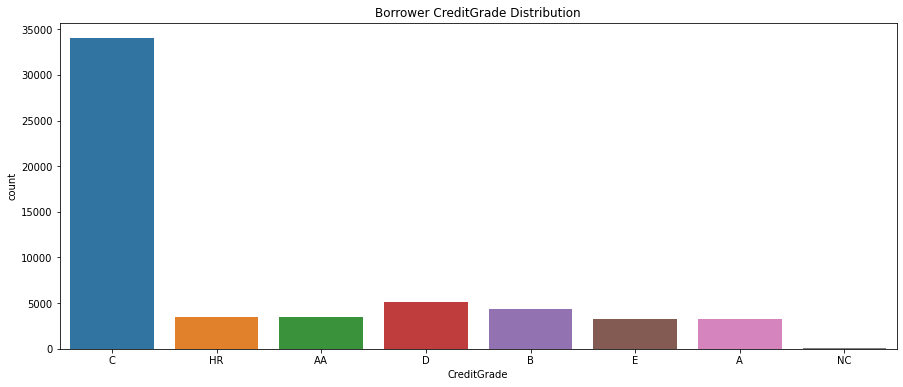

In [237]:
# Check the univariate relationship of Credit Grade

# creditGrade column nature has in categorical form

plt.figure(figsize=[15, 6])
sns.countplot(df_filter["CreditGrade"])
plt.title('Borrower CreditGrade Distribution');

### In "CreditGrade" column C- Grade has higher Borrower CreditGrade

#### Question 2 : Since there are so much low Credit Grade such as C and D , does it lead to a higher amount of deliquency?

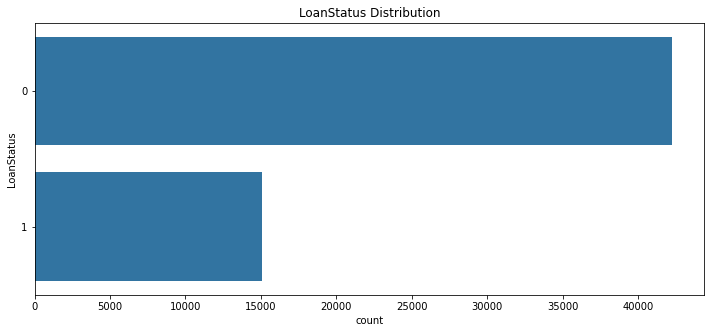

In [238]:
# Check the univariate relationship of Loan Status

plt.figure(figsize = [12,5])
default_color = sns.color_palette()[0]
sns.countplot(data = df_filter, y = 'LoanStatus', color = default_color)
plt.title('LoanStatus Distribution');


# Observation ::


### we are visualized in the graph of the borrower creditGrade distribution for C,D that
### we conclude that C and D has the highest Count so then the deliquency of <180 days has been excluded so that's why it will lead to higher amount of deliquency.

#### Question 3 : What is the highest number of BorrowerRate?

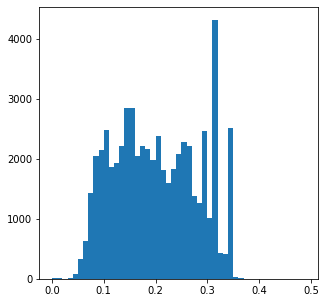

In [239]:
# Check the univariate relationship of Borrower rate

plt.figure(figsize = [5,5])
bins = np.arange(0,0.5, 0.01)
plt.hist(data= df_filter, x='BorrowerRate', bins= bins);
plt.show()

# Observation ::


### so the highest number of BorrowerRate is between 0.1 to 0.2 range

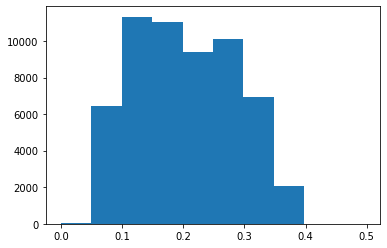

In [240]:
plt.hist(df_filter['BorrowerRate'])
plt.show()

#### Question 4 : Since the highest number of Borrower Rate is between 0.1 and 0.2, does the highest number of Lender Yield is between 0.1 and 0.2?

In [241]:
df_filter["LenderYield"]

0         0.1380
2         0.2400
11        0.1225
12        0.1335
15        0.3077
           ...  
113927    0.0579
113928    0.1799
113929    0.2539
113933    0.1010
113935    0.2505
Name: LenderYield, Length: 57324, dtype: float64

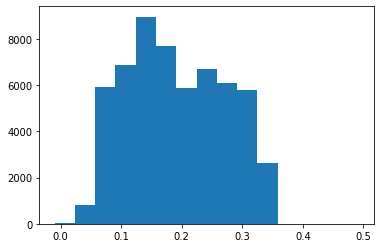

In [242]:
# Check the univariate relationship of Lender Yield on Loan

plt.hist(df_filter["LenderYield"],bins= 15)
plt.show()

# Observation ::

# LenderYield column nature has in Numerical form and it's continous data
### Yes we see here also that the highest number/most values of Lender Yield is between 0.1 , 0.2 and 0.3

<AxesSubplot:xlabel='LenderYield', ylabel='Density'>

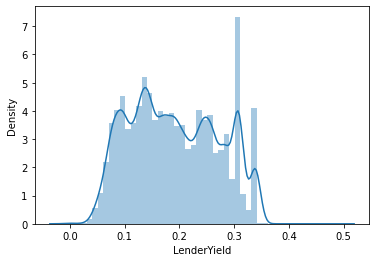

In [243]:
sns.distplot(df_filter["LenderYield"])
# This distplot visualize better using kde

#### Question 5 : Is the Credit Grade really accurate? Does higher Credit Grade leads to higher Monthly Loan Payment? As for Higher Credit Grade we mean from Grade AA to B

<AxesSubplot:xlabel='CreditGrade', ylabel='MonthlyLoanPayment'>

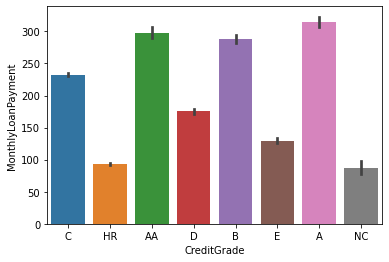

In [244]:
# BAR PLOT (Numerical - Categorical) 

sns.barplot(df_filter["CreditGrade"],df_filter['MonthlyLoanPayment'])

# Obeservation :
# "HR", "E" and "NC" has low Monthly Loan Payment as compared to rest of creditGrade data

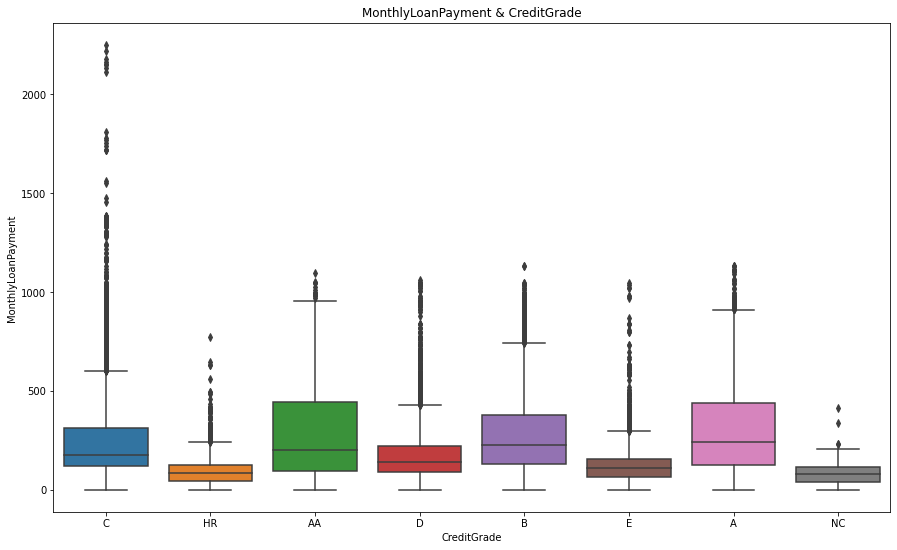

In [245]:
# Check the Bivariate Relationship between CreditGrade and MonthlyLoanPayment


plt.figure(figsize = [15, 9])
sns.boxplot(data=df_filter,x='CreditGrade',y='MonthlyLoanPayment');
plt.xlabel('CreditGrade');
plt.ylabel('MonthlyLoanPayment');
plt.title('MonthlyLoanPayment & CreditGrade');

# Observation ::

### "CreditGrade" and "MonthlyLoanPayment" are Categorical and Numerical data
### Credit Grade is accurate , 
### for MonthlyLoanPayment we see that "AA" , "A" and "B" Higher
### and the rest of the MonthlyLoanPayment that is ("HR", "E","NC") is low

#### Question 6 : Here we look at the Completed Loan Status and Defaulted Rate to determine the accuracy of Credit Grade.

<AxesSubplot:xlabel='LoanStatus', ylabel='CreditGrade'>

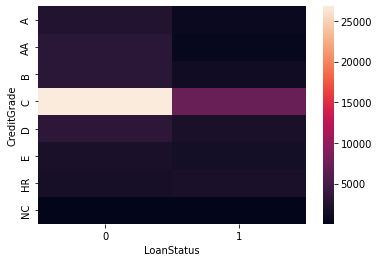

In [246]:
# using crosstab for small dataframe
sns.heatmap(pd.crosstab(df_filter['CreditGrade'],df_filter['LoanStatus']))

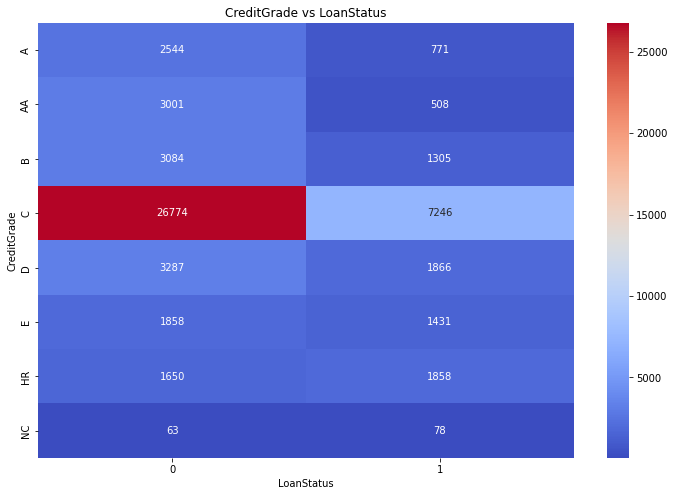

In [247]:
# Check the Bivariate Relatonship between CreditGrade and LoanStatus


cat_counts = df_filter.groupby(['CreditGrade', 'LoanStatus']).count()['LoanOriginationDate']
cat_counts = cat_counts.reset_index()
cat_counts = cat_counts.rename(columns={'LoanOriginationDate': 'count'}) 
cat_counts = cat_counts.pivot(index = 'CreditGrade', columns = 'LoanStatus', values = 'count')
cat_counts.fillna(0, inplace=True)
cat_counts.fillna(0, inplace=True)

plt.figure(figsize = [12, 8])
sns.heatmap(cat_counts, cmap = 'coolwarm', annot = True, fmt = ".0f")
plt.title('CreditGrade vs LoanStatus');

# Observation ::

# Both "CreditGrade" and "LoanStatus" columns are categorical data 
## By using Heat map for Checking  the accuracy of Credit Grade we conclude here that :

## The similar colors across the rows suggests that the "LoanStatus" group sizes are similarly sized and distributed similarly across levels of "CreditGrade". 
## The 'Completed' LoanStatus Contains higher counts of 'CreditGrade', Especially the CreidtGrade 'C' in Completed Loan status which contain the higher counts of CreidtGrade Score shown in this Heatmap.

#### Question 7 : Now we know the Credit Grade is accurate and is a tool that is used by the organization in determining the person’s creditworthiness. Now we need to understand does the ProsperScore, the custom built risk assesment system is being used in determing borrower’s rate?

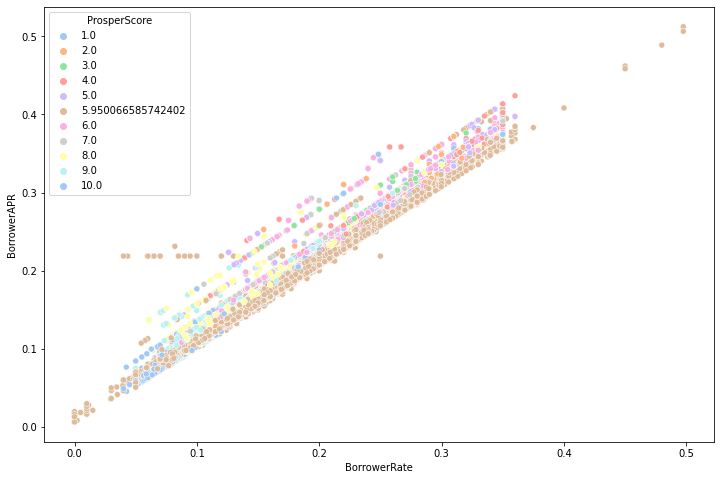

In [248]:
# Check the Multivariate Relationship between BorrowerRate and BorrowerAPR.
plt.figure(figsize = [12, 8])
sns.scatterplot(df_filter["BorrowerRate"],df_filter["BorrowerAPR"],hue=df_filter["ProsperScore"],palette='pastel',legend='brief')
plt.show()

In [249]:
# Observation ::

## checking the Multivariate Relationship between BorrowerRate and BorrowerAPR using ScatterPlot :

## This ScatterPlot chart confirms the relations between BorrowerAPR and BorrowerRate, they have strong positive relationship.

## it shows that most of loans with lower BorrowerAPR & BorrowerRate have higher ProsperScore.

### <------------------------------------------------------------------------------------------------------------------------------------------------------->

## Task - 3

> ### 3.0 Feature Engineering

>#### Feature Transformation :
* missing value imputation
* Handling Categorical Features
* Outliers Detection
* Feature Scaling

#### 
* Handling missing values

In [250]:
# Checking null values
df_filter.isnull().sum()

# there is no missing values in dataframe

ListingCreationDate                   0
CreditGrade                           0
Term                                  0
LoanStatus                            0
BorrowerAPR                           0
BorrowerRate                          0
LenderYield                           0
EstimatedEffectiveYield               0
EstimatedLoss                         0
EstimatedReturn                       0
ProsperRating (numeric)               0
ProsperRating (Alpha)                 0
ProsperScore                          0
ListingCategory (numeric)             0
BorrowerState                         0
Occupation                            0
EmploymentStatus                      0
EmploymentStatusDuration              0
IsBorrowerHomeowner                   0
CurrentlyInGroup                      0
DateCreditPulled                      0
CreditScoreRangeLower                 0
CreditScoreRangeUpper                 0
FirstRecordedCreditLine               0
CurrentCreditLines                    0


#### 3.1 Handling categorical columns by using Label Encoding method

In [253]:
# Performing Label Encoding to selected features

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

encoding_column = [
 'ListingCreationDate',
 'CreditGrade',
 'LoanStatus',
 'ProsperRating (Alpha)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'DateCreditPulled',
 'FirstRecordedCreditLine',
 'IncomeRange',
 'LoanOriginationDate',
 'LoanOriginationQuarter']


#  label encoding of multiple features at once

df_filter[encoding_column] = df_filter[encoding_column].apply(LabelEncoder().fit_transform)
df_filter.head()


ListingCreationDate  CreditGrade  Term  LoanStatus  BorrowerAPR  \
0                  4506            3    36           0      0.16516   
2                   371            6    36           0      0.28269   
11                13671            3    36           0      0.15033   
12                  556            3    36           0      0.17969   
15                 7065            3    36           0      0.35797   

    BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0         0.1580       0.1380                 0.168661       0.080306   
2         0.2750       0.2400                 0.168661       0.080306   
11        0.1325       0.1225                 0.168661       0.080306   
12        0.1435       0.1335                 0.126400       0.052400   
15        0.3177       0.3077                 0.289600       0.165000   

    EstimatedReturn  ProsperRating (numeric)  ProsperRating (Alpha)  \
0          0.096068                 4.072243                      3   
2          0.096068                 4.072243                      3   
11         0.096068                 4.072243                      3   
12         0.074000                 5.000000                      2   
15         0.124600                 1.000000                      6   

    ProsperScore  ListingCategory (numeric)  BorrowerState  Occupation  \
0       5.950067                          0              5          35   
2       5.950067                          0             10          35   
11      5.950067                          0              4          66   
12      4.000000                          1              1          48   
15      5.000000                         13              9          35   

    EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0                  7                  2.000000                 True   
2                  2                 96.071582                False   
11                 1                 19.000000                False   
12                 0                  1.000000                False   
15                 4                121.000000                 True   

    CurrentlyInGroup  DateCreditPulled  CreditScoreRangeLower  \
0               True             29940                  640.0   
2               True              2975                  480.0   
11             False             14031                  640.0   
12             False             11869                  680.0   
15             False             27170                  700.0   

    CreditScoreRangeUpper  FirstRecordedCreditLine  CurrentCreditLines  \
0                   659.0                      855            5.000000   
2                   499.0                     7539           10.317192   
11                  659.0                     1710            2.000000   
12                  699.0                     2333            9.000000   
15                  719.0                     4636           10.000000   

    OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
0          4.000000                        12.0                      1   
2          9.260164                         3.0                      0   
11         2.000000                        10.0                      1   
12         7.000000                        29.0                      8   
15         9.000000                        18.0                      5   

    OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
0                            24                   3.0             3.0   
2                             0                   0.0             1.0   
11                           40                   3.0             5.0   
12                          290                   1.0             4.0   
15                          300                   0.0             1.0   

    CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
0                    2.0        472.000000      

 #### 3.2 Handling Outliers
 
> What is outliers?
* A data point which is significantly far from other data points
* so for now to detect and remove outlies we're using IQR(INTER QUARTILE RANGE) method
* IQR = Q3 - Q1
* lower boundary  = Q1- 1.5*IQR
* Higher boundary = Q3+ 1.5*IQR
* Boxplot

Column: AmountDelinquent, Number of outliers: 12758


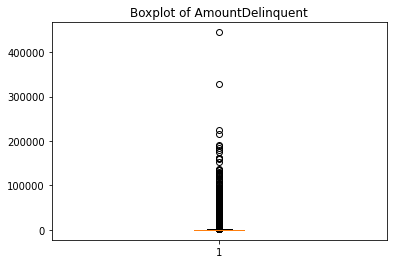

Column: AvailableBankcardCredit, Number of outliers: 5464


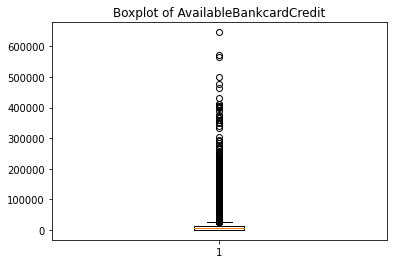

Column: BankcardUtilization, Number of outliers: 49


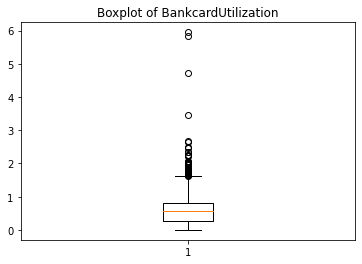

Column: BorrowerAPR, Number of outliers: 1


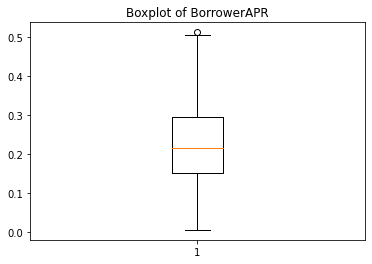

Column: BorrowerRate, Number of outliers: 3


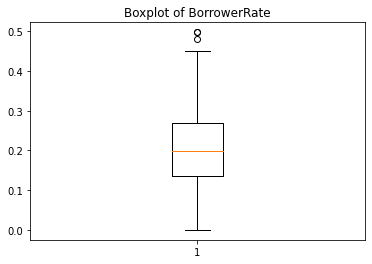

Column: CreditGrade, Number of outliers: 23304


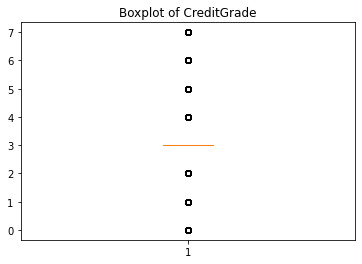

Column: CreditScoreRangeLower, Number of outliers: 1411


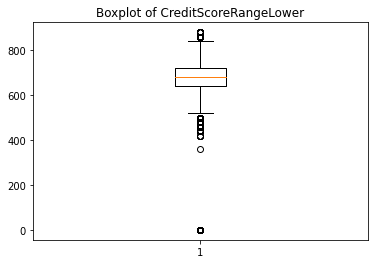

Column: CreditScoreRangeUpper, Number of outliers: 1411


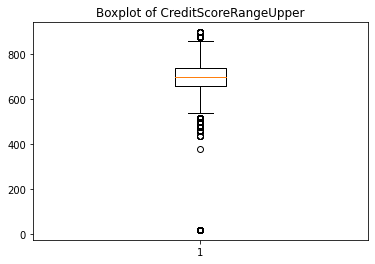

Column: CurrentCreditLines, Number of outliers: 1689


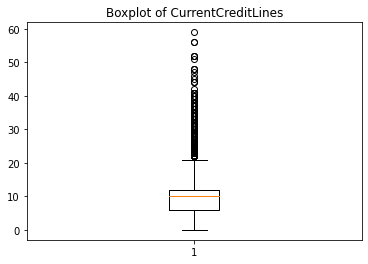

Column: CurrentDelinquencies, Number of outliers: 5829


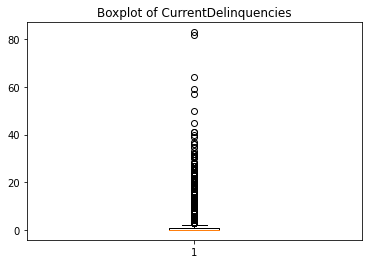

Column: DebtToIncomeRatio, Number of outliers: 2814


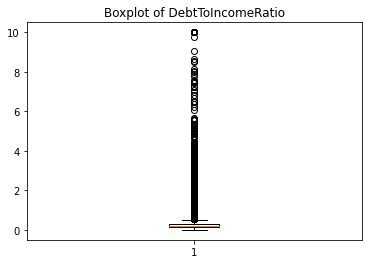

Column: DelinquenciesLast7Years, Number of outliers: 8036


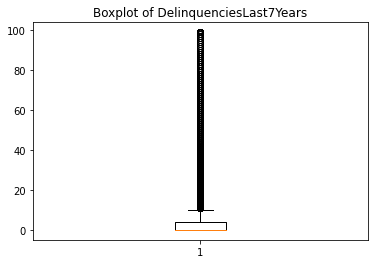

Column: EmploymentStatus, Number of outliers: 6325


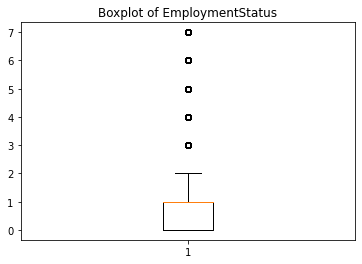

Column: EmploymentStatusDuration, Number of outliers: 4322


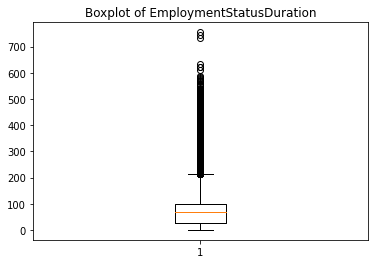

Column: EstimatedEffectiveYield, Number of outliers: 25417


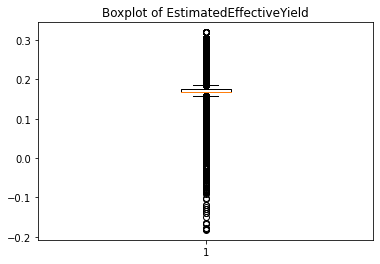

Column: EstimatedLoss, Number of outliers: 15150


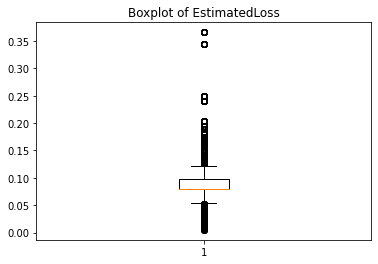

Column: EstimatedReturn, Number of outliers: 12169


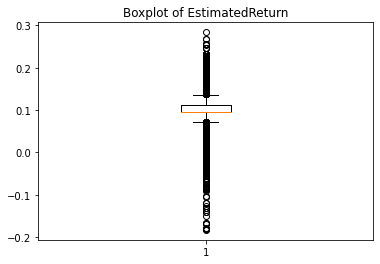

Column: IncomeRange, Number of outliers: 0


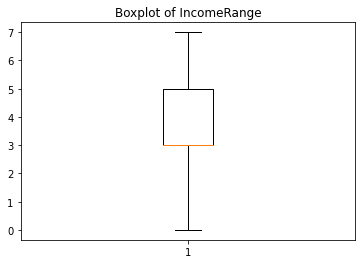

Column: InquiriesLast6Months, Number of outliers: 2782


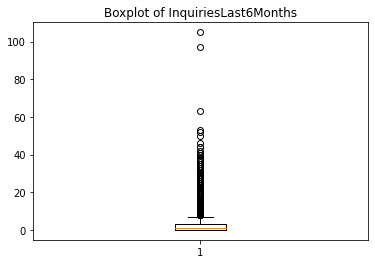

Column: InvestmentFromFriendsAmount, Number of outliers: 2021


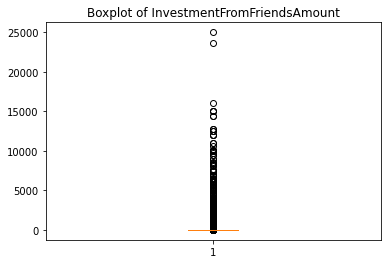

Column: InvestmentFromFriendsCount, Number of outliers: 2021


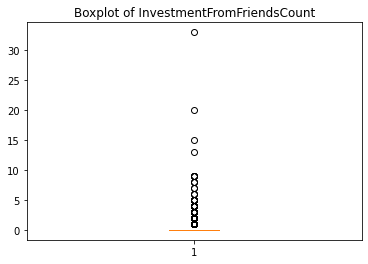

Column: Investors, Number of outliers: 3374


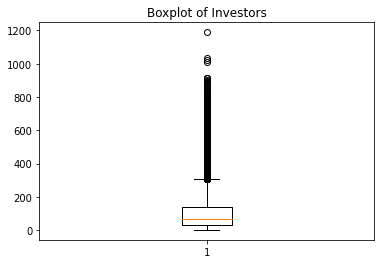

Column: LP_CollectionFees, Number of outliers: 7131


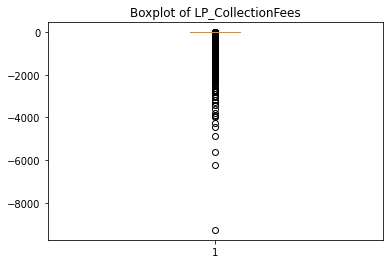

Column: LP_CustomerPayments, Number of outliers: 3507


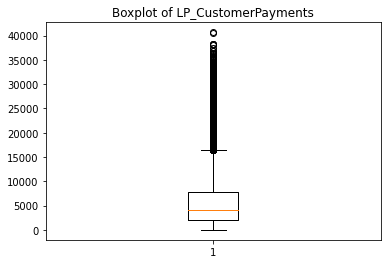

Column: LP_CustomerPrincipalPayments, Number of outliers: 4276


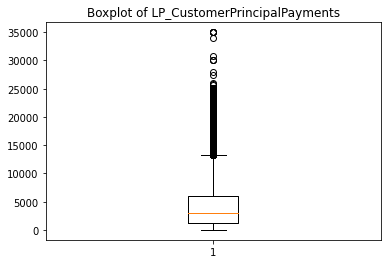

Column: LP_GrossPrincipalLoss, Number of outliers: 8998


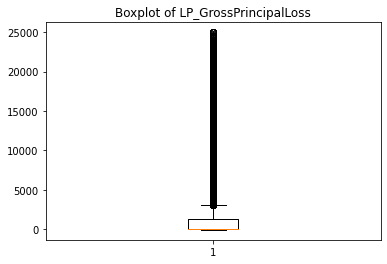

Column: LP_InterestandFees, Number of outliers: 3264


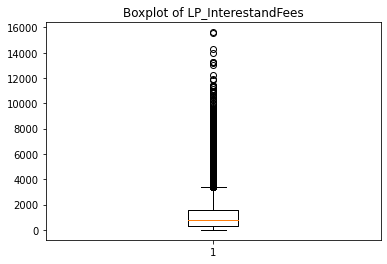

Column: LP_NetPrincipalLoss, Number of outliers: 9763


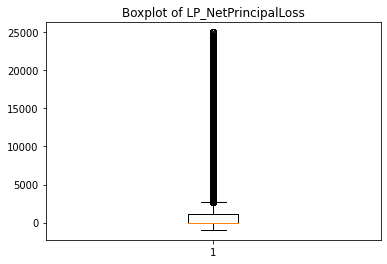

Column: LP_NonPrincipalRecoverypayments, Number of outliers: 3261


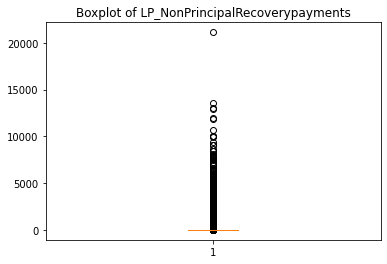

Column: LP_ServiceFees, Number of outliers: 3342


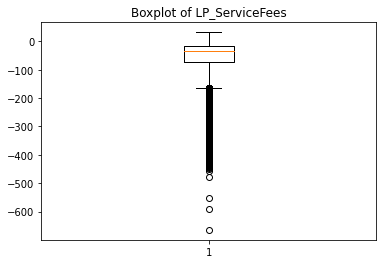

Column: LenderYield, Number of outliers: 3


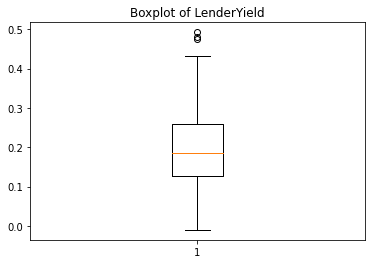

Column: ListingCategory (numeric), Number of outliers: 2347


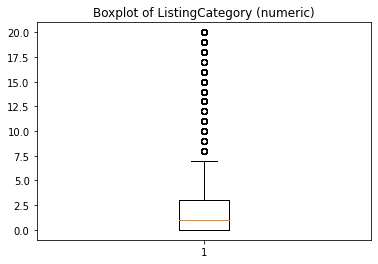

Column: LoanOriginalAmount, Number of outliers: 2958


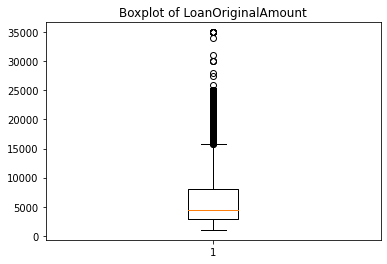

Column: LoanStatus, Number of outliers: 0


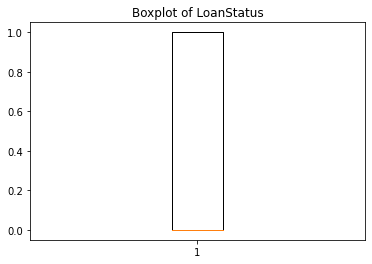

Column: MonthlyLoanPayment, Number of outliers: 2562


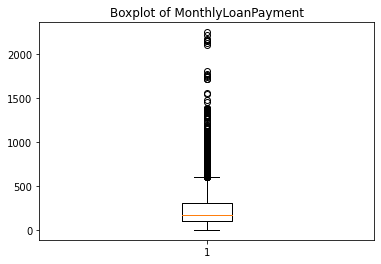

Column: OpenCreditLines, Number of outliers: 2488


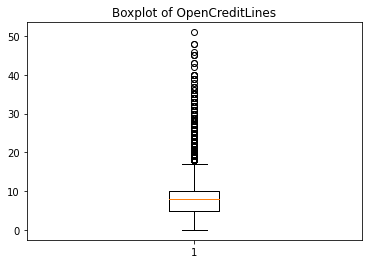

Column: OpenRevolvingAccounts, Number of outliers: 2239


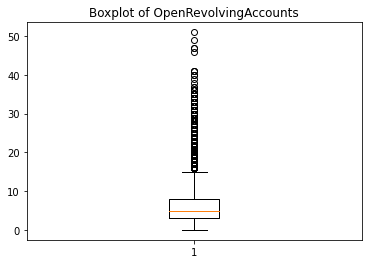

Column: OpenRevolvingMonthlyPayment, Number of outliers: 3906


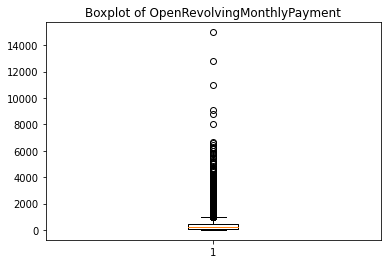

Column: PercentFunded, Number of outliers: 454


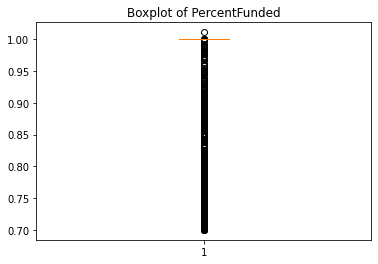

Column: ProsperScore, Number of outliers: 23943


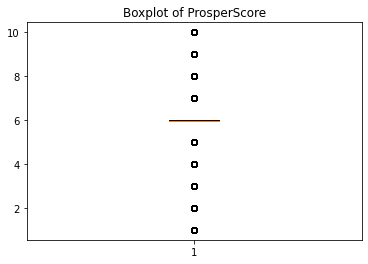

Column: PublicRecordsLast10Years, Number of outliers: 13636


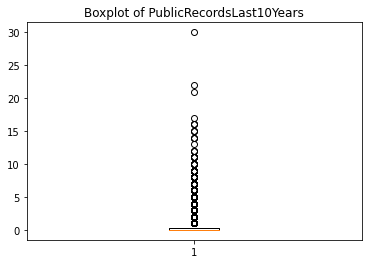

Column: PublicRecordsLast12Months, Number of outliers: 8612


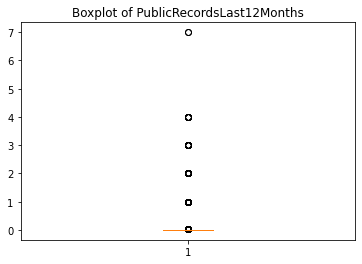

Column: Recommendations, Number of outliers: 3826


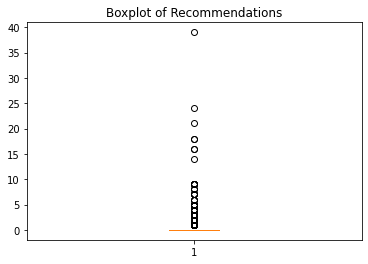

Column: RevolvingCreditBalance, Number of outliers: 4182


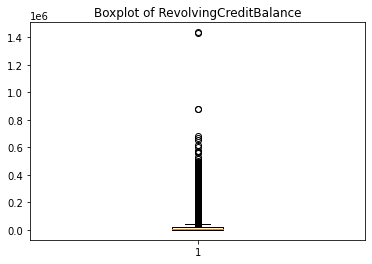

Column: StatedMonthlyIncome, Number of outliers: 2760


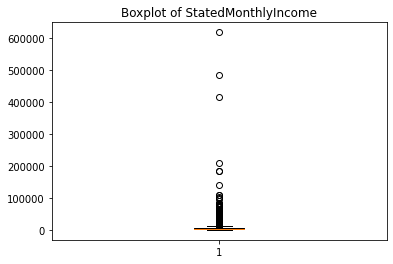

Column: Term, Number of outliers: 5957


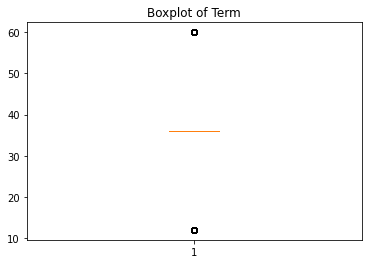

Column: TotalCreditLinespast7years, Number of outliers: 1141


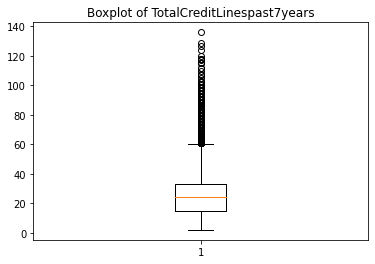

Column: TotalInquiries, Number of outliers: 3493


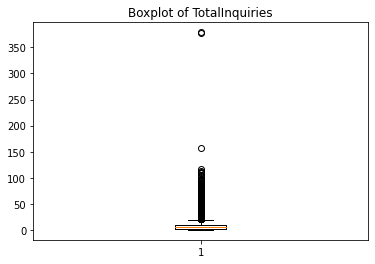

Column: TotalTrades, Number of outliers: 2027


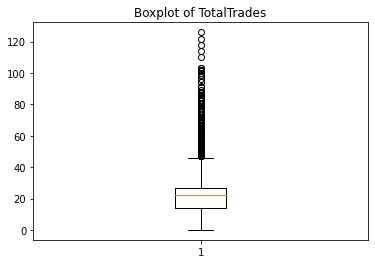

Column: TradesNeverDelinquent (percentage), Number of outliers: 2638


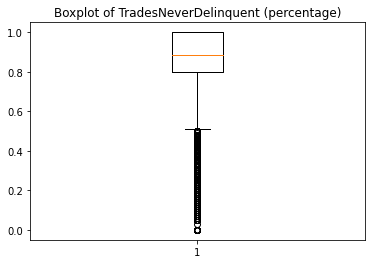

Column: TradesOpenedLast6Months, Number of outliers: 4631


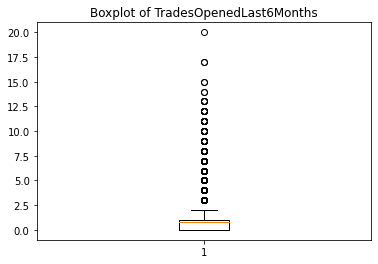

In [261]:
# Define a list of column names for which you want to detect outliers
columns_to_check = ['AmountDelinquent', 'AvailableBankcardCredit', 'BankcardUtilization', 'BorrowerAPR', 'BorrowerRate', 'CreditGrade','CreditScoreRangeLower', 
                    'CreditScoreRangeUpper', 'CurrentCreditLines', 'CurrentDelinquencies', 'DebtToIncomeRatio', 'DelinquenciesLast7Years',
                    'EmploymentStatus', 'EmploymentStatusDuration', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'IncomeRange',
                    'InquiriesLast6Months', 'InvestmentFromFriendsAmount', 'InvestmentFromFriendsCount', 'Investors', 'LP_CollectionFees',
                    'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_GrossPrincipalLoss', 'LP_InterestandFees', 'LP_NetPrincipalLoss',
                    'LP_NonPrincipalRecoverypayments', 'LP_ServiceFees', 'LenderYield', 'ListingCategory (numeric)',
                    'LoanOriginalAmount', 'LoanStatus', 'MonthlyLoanPayment', 'OpenCreditLines', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
                    'PercentFunded', 'ProsperScore', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'Recommendations', 'RevolvingCreditBalance',
                    'StatedMonthlyIncome', 'Term', 'TotalCreditLinespast7years', 'TotalInquiries', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 
                    'TradesOpenedLast6Months']

# Loop through each column and detect outliers using IQR and boxplot
for column in columns_to_check:
    # Calculate the IQR for the column
    Q1 = df_filter[column].quantile(0.25)
    Q3 = df_filter[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds for outliers detection
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    # Find the outliers in the column
    outliers = df_filter[(df_filter[column] > upper_bound) | (df_filter[column] < lower_bound)]
    
    # Print the number of outliers found in the column
    print(f'Column: {column}, Number of outliers: {len(outliers)}')
    
    # Create a boxplot to visualize the distribution of the column
    plt.figure()
    plt.boxplot(df_filter[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


In [263]:
# Use the describe() method to generate summary statistics for all columns
summary = df_filter.describe()

# Calculate the interquartile range (IQR) for each column
Q1 = summary.loc['25%']
Q3 = summary.loc['75%']
IQR = Q3 - Q1

# Identify outliers for each column
outliers = ((df_filter < (Q1 - 1.5 * IQR)) | (df_filter > (Q3 + 1.5 * IQR)))

# Get the columns with outliers
outliers_columns = outliers. any()

# Print the columns with outliers
print("Columns with outliers: \n")
print(outliers_columns[outliers_columns == True].index.tolist())

Columns with outliers: 

['AmountDelinquent', 'AvailableBankcardCredit', 'BankcardUtilization', 'BorrowerAPR', 'BorrowerRate', 'CreditGrade', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines', 'CurrentDelinquencies', 'DebtToIncomeRatio', 'DelinquenciesLast7Years', 'EmploymentStatus', 'EmploymentStatusDuration', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'InquiriesLast6Months', 'InvestmentFromFriendsAmount', 'InvestmentFromFriendsCount', 'Investors', 'LP_CollectionFees', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_GrossPrincipalLoss', 'LP_InterestandFees', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'LP_ServiceFees', 'LenderYield', 'ListingCategory (numeric)', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'OpenCreditLines', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'PercentFunded', 'ProsperRating (Alpha)', 'ProsperRating (numeric)', 'ProsperScore', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', '

In [264]:
outliers_columns.value_counts()

True     51
False    13
dtype: int64

<AxesSubplot:xlabel='ProsperScore'>

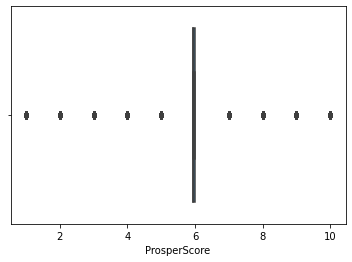

In [265]:
sns.boxplot(df_filter['ProsperScore'])

In [266]:
# Calculate the IQR
Q1 = df_filter["BorrowerAPR"].quantile(0.25)
Q2 = df_filter["BorrowerAPR"].quantile(0.50)
Q3 = df_filter["BorrowerAPR"].quantile(0.75)
IQR = Q3 - Q1
print ("IQR :: ",IQR)

# Define the outlier threshold
lowertail = Q1 - (1.5 * IQR)
uppertail = Q3 + (1.5 * IQR)

print ("uppertail value ::", uppertail)
print ("lowertail value ::", lowertail)


IQR ::  0.14343000000000003
uppertail value :: 0.5106850000000001
lowertail value :: -0.06303500000000004


In [267]:
df_filter['AvailableBankcardCredit'].describe()

count     57324.000000
mean      10800.198988
std       20399.690516
min           0.000000
25%         738.000000
50%        4937.500000
75%       11210.225447
max      646285.000000
Name: AvailableBankcardCredit, dtype: float64

<AxesSubplot:xlabel='LoanStatus', ylabel='BankcardUtilization'>

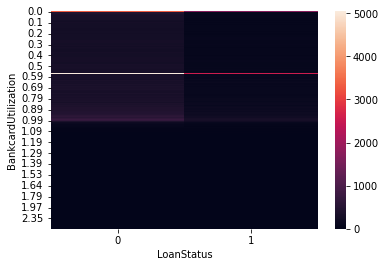

In [268]:
sns.heatmap(pd.crosstab(df_filter['BankcardUtilization'],df_filter['LoanStatus']))

<AxesSubplot:xlabel='BorrowerAPR', ylabel='Density'>

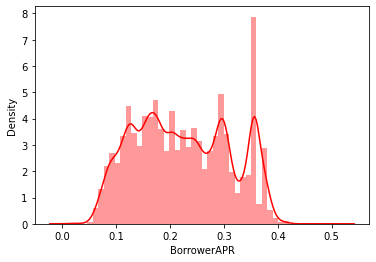

In [269]:
# sns.displot(df_filter['AvailableBankcardCredit'])
sns.distplot(df_filter['BorrowerAPR'], kde = True, color ='red')

-----------------------------

In [270]:
# Important features for outliers detection

# ['AmountDelinquent',"BankcardUtilization","BorrowerAPR",'BorrowerRate','CreditGrade','CurrentDelinquencies','EmploymentStatus',
# 'EmploymentStatusDuration','LenderYield','LoanCurrentDaysDelinquent','LoanOriginalAmount','LoanStatus','MonthlyLoanPayment',
#  'ProsperScore', 'Term']

<AxesSubplot:xlabel='LoanStatus', ylabel='BorrowerAPR'>

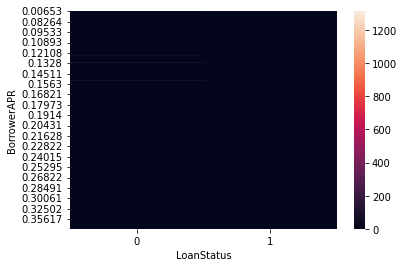

In [271]:
sns.heatmap(pd.crosstab(df_filter['BorrowerAPR'],df_filter['LoanStatus']))

* BankcardUtilization

In [272]:
# Using IQR Method removing ouliers


q1 = df_filter["BankcardUtilization"].quantile(0.25)
q2 = df_filter["BankcardUtilization"].quantile(0.50)
q3 = df_filter["BankcardUtilization"].quantile(0.75)

IQR = q3-q1
print ("IQR  :: ",IQR)

uppertail =q3 + (1.5*IQR)
lowertail =q1 - (1.5*IQR)

print ("uppertail value >>" ,uppertail)
print ("lowertail value >>" ,lowertail)

IQR  ::  0.54
uppertail value >> 1.62
lowertail value >> -0.54


In [273]:
df_filter['BankcardUtilization'].describe()

count    57324.000000
mean         0.536241
std          0.325711
min          0.000000
25%          0.270000
50%          0.561309
75%          0.810000
max          5.950000
Name: BankcardUtilization, dtype: float64

In [274]:
df_filter.loc[(df_filter["BankcardUtilization"] > uppertail)] 

ListingCreationDate  CreditGrade  Term  LoanStatus  BorrowerAPR  \
5031                  16301            6    36           1      0.34398   
9196                   7158            5    36           1      0.34661   
11972                 18039            6    36           1      0.16802   
14878                  9016            6    36           1      0.37453   
26151                 23424            2    36           0      0.12700   
28051                 12112            6    36           1      0.25903   
28115                 11080            3    36           0      0.39142   
31515                 11868            4    36           1      0.24753   
32777                  5504            5    36           0      0.22439   
32845                 13224            5    36           0      0.23880   
32913                 11707            5    36           1      0.36133   
35640                 25711            6    36           0      0.27306   
36326                 13702            6    36           0      0.16991   
36461                 21540            6    36           0      0.37443   
37107                  8078            5    36           0      0.39261   
49673                 12552            3    36           1      0.28320   
50013                 16772            6    36           1      0.24487   
50306                 25667            6    36           1      0.29554   
53951                 16144            6    36           0      0.23981   
60997                 10510            6    36           1      0.30564   
65752                  4233            5    36           1      0.21223   
67184                  1468            5    36           0      0.30349   
70752                 16003            6    36           1      0.29595   
71170                 27550            6    36           1      0.37453   
71777                 11995            5    36           0      0.41355   
75144                 21074            5    36           0      0.19986   
76462                  3350            6    36           1      0.27306   
76773                  2570            3    36           1      0.35244   
78628                 24245            3    36           1      0.34215   
82137                 23604            6    36           1      0.30962   
83609                  9958            6    36           1      0.30564   
84202                 22663            6    36           1      0.37402   
86204                 24006            3    36           1      0.18726   
86591                 14046            4    36           1      0.33393   
87275                  6224            2    36           0      0.21097   
89611                 15353            5    36           1      0.37357   
89878                  4174            6    36           1      0.27535   
89999                 25083            6    36           0      0.27535   
94925                   263            4    36           1      0.27205   
100683                21894            3    36           1      0.33393   
102530                 4678            3    36           1      0.28370   
105762                23501            5    36           1      0.37453   
106639                 7289            5    36           0      0.16988   
106943                22567            4    36           1      0.22428   
109689                26644            5    36           0      0.36844   
110122                 6212            6    36           1      0.30564   
111123                18197            6    36           0      0.30339   
112208                20988            5    36           0      0.30564   
112889                 5734            6    36           0      0.20673   

        BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
5031          0.3199       0.3099                 0.168661       0.080306   
9196          0.3225       0.3125                 0.168661       0.080306   
11972         0.1500      

In [275]:
df_filter.loc[(df_filter["BankcardUtilization"] < lowertail)]

Empty DataFrame
Columns: [ListingCreationDate, CreditGrade, Term, LoanStatus, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanMonthsSinceOrigination, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, PercentFunded, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors]
Index: []

In [276]:
# finding data without ouliers
df_filter.loc[(df_filter["BankcardUtilization"]<=uppertail) & (df_filter["BankcardUtilization"]>=lowertail)]

ListingCreationDate  CreditGrade  Term  LoanStatus  BorrowerAPR  \
0                      4506            3    36           0      0.16516   
2                       371            6    36           0      0.28269   
11                    13671            3    36           0      0.15033   
12                      556            3    36           0      0.17969   
15                     7065            3    36           0      0.35797   
...                     ...          ...   ...         ...          ...   
113927                12108            1    36           0      0.07469   
113928                 1318            3    36           0      0.22362   
113929                19229            3    36           0      0.30285   
113933                20637            3    36           0      0.13220   
113935                 8831            3    60           0      0.28408   

        BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0             0.1580       0.1380                 0.168661       0.080306   
2             0.2750       0.2400                 0.168661       0.080306   
11            0.1325       0.1225                 0.168661       0.080306   
12            0.1435       0.1335                 0.126400       0.052400   
15            0.3177       0.3077                 0.289600       0.165000   
...              ...          ...                      ...            ...   
113927        0.0679       0.0579                 0.168661       0.080306   
113928        0.1899       0.1799                 0.175700       0.061000   
113929        0.2639       0.2539                 0.231800       0.122500   
113933        0.1110       0.1010                 0.100700       0.020000   
113935        0.2605       0.2505                 0.244500       0.085000   

        EstimatedReturn  ProsperRating (numeric)  ProsperRating (Alpha)  \
0              0.096068                 4.072243                      3   
2              0.096068                 4.072243                      3   
11             0.096068                 4.072243                      3   
12             0.074000                 5.000000                      2   
15             0.124600                 1.000000                      6   
...                 ...                      ...                    ...   
113927         0.096068                 4.072243                      3   
113928         0.114700                 4.000000                      3   
113929         0.109300                 2.000000                      5   
113933         0.080700                 6.000000                      0   
113935         0.159500                 4.000000                      3   

        ProsperScore  ListingCategory (numeric)  BorrowerState  Occupation  \
0           5.950067                          0              5          35   
2           5.950067                          0             10          35   
11          5.950067                          0              4          66   
12          4.000000                          1              1          48   
15          5.000000                         13              9          35   
...              ...                        ...            ...         ...   
113927      5.950067                          4             47          19   
113928      6.000000                          3              5          35   
113929      3.000000                          2              9           0   
113933      8.000000                          7             38          41   
113935      5.000000                          2             10          22   

        EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0                      7                  2.000000                 True   
2                      2                 96.071582                False   
11                     1                 19.000000                False   
12                     0                  1.

In [277]:
mean_data = df_filter.loc[(df_filter["BankcardUtilization"]<=uppertail) & (df_filter["BankcardUtilization"]>=lowertail),"BankcardUtilization"].mean()
mean_data = int(np.ceil(mean_data))
mean_data

1

In [278]:
# outliers handling
df_filter.loc[(df_filter["BankcardUtilization"]>uppertail),"BankcardUtilization"] = mean_data

In [279]:
# Capping

In [280]:
IQR = q3-q1
print ("IQR  :: ",IQR)

IQR  ::  0.54


In [281]:
def capping(x):
    if x < lowertail:
        x = lowertail
        return x
    elif x > uppertail:
        x = uppertail
        return x
    else:
        return x

In [282]:
df_filter.BankcardUtilization = df_filter.BankcardUtilization.apply(capping)

<AxesSubplot:xlabel='BankcardUtilization'>

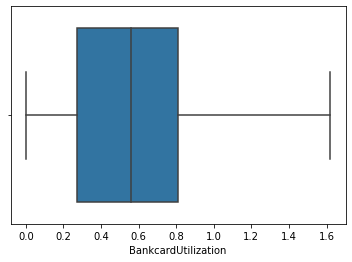

In [283]:
sns.boxplot(x = 'BankcardUtilization', data = df_filter)

---------------------------------------------------------------------------------------------------------------------------------------------------------

* BorrowerAPR

<AxesSubplot:xlabel='BorrowerAPR'>

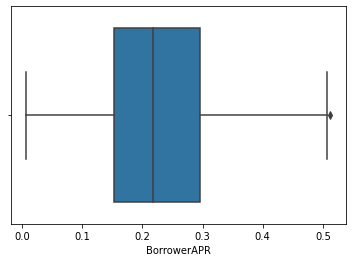

In [284]:
sns.boxplot(df_filter['BorrowerAPR'])

In [285]:
q1 = df_filter["BorrowerAPR"].quantile(0.25)
q2 = df_filter["BorrowerAPR"].quantile(0.50)
q3 = df_filter["BorrowerAPR"].quantile(0.75)

IQR = q3-q1
print ("IQR  :: ",IQR)

uppertail =q3 + (1.5*IQR)
lowertail =q1 - (1.5*IQR)

print ("uppertail value >>" ,uppertail)
print ("lowertail value >>" ,lowertail)

IQR  ::  0.14343000000000003
uppertail value >> 0.5106850000000001
lowertail value >> -0.06303500000000004


In [286]:
df_filter["BorrowerAPR"].describe()

count    57324.000000
mean         0.223917
std          0.087856
min          0.006530
25%          0.152110
50%          0.217390
75%          0.295540
max          0.512290
Name: BorrowerAPR, dtype: float64

In [287]:
df_filter.loc[(df_filter["BorrowerAPR"] > uppertail)]

ListingCreationDate  CreditGrade  Term  LoanStatus  BorrowerAPR  \
36018                27431            6    36           0      0.51229   

       BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
36018        0.4975       0.4925                 0.168661       0.080306   

       EstimatedReturn  ProsperRating (numeric)  ProsperRating (Alpha)  \
36018         0.096068                 4.072243                      3   

       ProsperScore  ListingCategory (numeric)  BorrowerState  Occupation  \
36018      5.950067                          0              4          35   

       EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
36018                 0                 96.071582                False   

       CurrentlyInGroup  DateCreditPulled  CreditScoreRangeLower  \
36018             False             37199             685.567731   

       CreditScoreRangeUpper  FirstRecordedCreditLine  CurrentCreditLines  \
36018             704.567731                     2376           10.317192   

       OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
36018         9.260164                   26.754539                      0   

       OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
36018                            0              1.435085        5.584405   

       CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
36018              0.592052        984.507059                 4.154984   

       PublicRecordsLast10Years  PublicRecordsLast12Months  \
36018                  0.312646                   0.015094   

       RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  \
36018            17598.706751             0.561309             11210.225447   

       TotalTrades  TradesNeverDelinquent (percentage)  \
36018    23.230034                            0.885897   

       TradesOpenedLast6Months  DebtToIncomeRatio  IncomeRange  \
36018                 0.802327            0.02852            6   

       IncomeVerifiable  StatedMonthlyIncome  LoanMonthsSinceOrigination  \
36018              True               2838.0                          97   

       LoanOriginalAmount  LoanOriginationDate  LoanOriginationQuarter  \
36018                1500                  700                       0   

       MonthlyLoanPayment  LP_CustomerPayments  LP_CustomerPrincipalPayments  \
36018               80.94              1530.67                        1500.0   

       LP_InterestandFees  LP_ServiceFees  LP_CollectionFees  \
36018               30.67           -0.29                0.0   

       LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
36018                    0.0                  0.0   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
36018                              0.0            1.0                0   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount  Investors  
36018                           0                          0.0          9

In [288]:
df_filter.loc[(df_filter["BorrowerAPR"] < lowertail)] 

Empty DataFrame
Columns: [ListingCreationDate, CreditGrade, Term, LoanStatus, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanMonthsSinceOrigination, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, PercentFunded, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors]
Index: []

In [289]:
# finding data without ouliers
df_filter.loc[(df_filter["BorrowerAPR"]<=uppertail) & (df_filter["BorrowerAPR"]>=lowertail)]

ListingCreationDate  CreditGrade  Term  LoanStatus  BorrowerAPR  \
0                      4506            3    36           0      0.16516   
2                       371            6    36           0      0.28269   
11                    13671            3    36           0      0.15033   
12                      556            3    36           0      0.17969   
15                     7065            3    36           0      0.35797   
...                     ...          ...   ...         ...          ...   
113927                12108            1    36           0      0.07469   
113928                 1318            3    36           0      0.22362   
113929                19229            3    36           0      0.30285   
113933                20637            3    36           0      0.13220   
113935                 8831            3    60           0      0.28408   

        BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0             0.1580       0.1380                 0.168661       0.080306   
2             0.2750       0.2400                 0.168661       0.080306   
11            0.1325       0.1225                 0.168661       0.080306   
12            0.1435       0.1335                 0.126400       0.052400   
15            0.3177       0.3077                 0.289600       0.165000   
...              ...          ...                      ...            ...   
113927        0.0679       0.0579                 0.168661       0.080306   
113928        0.1899       0.1799                 0.175700       0.061000   
113929        0.2639       0.2539                 0.231800       0.122500   
113933        0.1110       0.1010                 0.100700       0.020000   
113935        0.2605       0.2505                 0.244500       0.085000   

        EstimatedReturn  ProsperRating (numeric)  ProsperRating (Alpha)  \
0              0.096068                 4.072243                      3   
2              0.096068                 4.072243                      3   
11             0.096068                 4.072243                      3   
12             0.074000                 5.000000                      2   
15             0.124600                 1.000000                      6   
...                 ...                      ...                    ...   
113927         0.096068                 4.072243                      3   
113928         0.114700                 4.000000                      3   
113929         0.109300                 2.000000                      5   
113933         0.080700                 6.000000                      0   
113935         0.159500                 4.000000                      3   

        ProsperScore  ListingCategory (numeric)  BorrowerState  Occupation  \
0           5.950067                          0              5          35   
2           5.950067                          0             10          35   
11          5.950067                          0              4          66   
12          4.000000                          1              1          48   
15          5.000000                         13              9          35   
...              ...                        ...            ...         ...   
113927      5.950067                          4             47          19   
113928      6.000000                          3              5          35   
113929      3.000000                          2              9           0   
113933      8.000000                          7             38          41   
113935      5.000000                          2             10          22   

        EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0                      7                  2.000000                 True   
2                      2                 96.071582                False   
11                     1                 19.000000                False   
12                     0                  1.

In [290]:
mean_data = df_filter.loc[(df_filter["BorrowerAPR"]<=uppertail) & (df_filter["BorrowerAPR"]>=lowertail),"BorrowerAPR"].mean()
mean_data = int(np.ceil(mean_data))
mean_data

1

In [291]:
# outliers handling
df_filter.loc[(df_filter["BorrowerAPR"]>uppertail),"BorrowerAPR"] = mean_data

In [292]:
df_filter.loc[(df_filter["BorrowerAPR"] > uppertail)]

ListingCreationDate  CreditGrade  Term  LoanStatus  BorrowerAPR  \
36018                27431            6    36           0          1.0   

       BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
36018        0.4975       0.4925                 0.168661       0.080306   

       EstimatedReturn  ProsperRating (numeric)  ProsperRating (Alpha)  \
36018         0.096068                 4.072243                      3   

       ProsperScore  ListingCategory (numeric)  BorrowerState  Occupation  \
36018      5.950067                          0              4          35   

       EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
36018                 0                 96.071582                False   

       CurrentlyInGroup  DateCreditPulled  CreditScoreRangeLower  \
36018             False             37199             685.567731   

       CreditScoreRangeUpper  FirstRecordedCreditLine  CurrentCreditLines  \
36018             704.567731                     2376           10.317192   

       OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
36018         9.260164                   26.754539                      0   

       OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
36018                            0              1.435085        5.584405   

       CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
36018              0.592052        984.507059                 4.154984   

       PublicRecordsLast10Years  PublicRecordsLast12Months  \
36018                  0.312646                   0.015094   

       RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  \
36018            17598.706751             0.561309             11210.225447   

       TotalTrades  TradesNeverDelinquent (percentage)  \
36018    23.230034                            0.885897   

       TradesOpenedLast6Months  DebtToIncomeRatio  IncomeRange  \
36018                 0.802327            0.02852            6   

       IncomeVerifiable  StatedMonthlyIncome  LoanMonthsSinceOrigination  \
36018              True               2838.0                          97   

       LoanOriginalAmount  LoanOriginationDate  LoanOriginationQuarter  \
36018                1500                  700                       0   

       MonthlyLoanPayment  LP_CustomerPayments  LP_CustomerPrincipalPayments  \
36018               80.94              1530.67                        1500.0   

       LP_InterestandFees  LP_ServiceFees  LP_CollectionFees  \
36018               30.67           -0.29                0.0   

       LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
36018                    0.0                  0.0   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
36018                              0.0            1.0                0   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount  Investors  
36018                           0                          0.0          9

In [293]:
# Capping

IQR = q3-q1
print ("IQR  :: ",IQR)

IQR  ::  0.14343000000000003


In [294]:
def capping(x):
    if x < lowertail:
        x = lowertail
        return x
    elif x > uppertail:
        x = uppertail
        return x
    else:
        return x

In [295]:
df_filter.BorrowerAPR = df_filter.BorrowerAPR.apply(capping)

<AxesSubplot:xlabel='BorrowerAPR'>

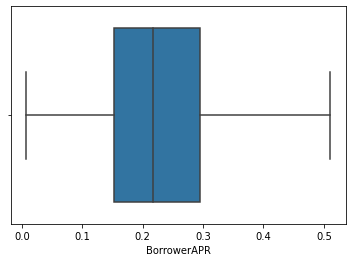

In [296]:
sns.boxplot(x = 'BorrowerAPR', data = df_filter)

---------------------------------------------------------------------------------------------------------------------------------------------------------

* BorrowerRate

<AxesSubplot:xlabel='BorrowerRate'>

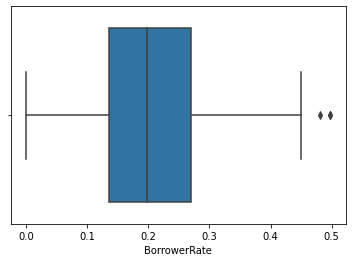

In [297]:
sns.boxplot(df_filter['BorrowerRate'])

In [298]:
q1 = df_filter["BorrowerRate"].quantile(0.25)
q2 = df_filter["BorrowerRate"].quantile(0.50)
q3 = df_filter["BorrowerRate"].quantile(0.75)

IQR = q3-q1
print ("IQR  :: ",IQR)

uppertail =q3 + (1.5*IQR)
lowertail =q1 - (1.5*IQR)

print ("uppertail value >>" ,uppertail)
print ("lowertail value >>" ,lowertail)

IQR  ::  0.13339999999999996
uppertail value >> 0.4699999999999999
lowertail value >> -0.06359999999999993


In [299]:
df_filter["BorrowerRate"].describe()

count    57324.000000
mean         0.201703
std          0.080930
min          0.000000
25%          0.136500
50%          0.198000
75%          0.269900
max          0.497500
Name: BorrowerRate, dtype: float64

In [300]:
df_filter.loc[(df_filter["BorrowerRate"] > uppertail)] 

ListingCreationDate  CreditGrade  Term  LoanStatus  BorrowerAPR  \
36018                27431            6    36           0     0.510685   
56761                14511            6    36           1     0.506330   
82043                  148            6    36           1     0.488730   

       BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
36018        0.4975       0.4925                 0.168661       0.080306   
56761        0.4975       0.4800                 0.168661       0.080306   
82043        0.4800       0.4750                 0.168661       0.080306   

       EstimatedReturn  ProsperRating (numeric)  ProsperRating (Alpha)  \
36018         0.096068                 4.072243                      3   
56761         0.096068                 4.072243                      3   
82043         0.096068                 4.072243                      3   

       ProsperScore  ListingCategory (numeric)  BorrowerState  Occupation  \
36018      5.950067                          0              4          35   
56761      5.950067                          0              4          35   
82043      5.950067                          0              4          35   

       EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
36018                 0                 96.071582                False   
56761                 0                 96.071582                False   
82043                 0                 96.071582                False   

       CurrentlyInGroup  DateCreditPulled  CreditScoreRangeLower  \
36018             False             37199             685.567731   
56761             False             26893             685.567731   
82043             False             24675             685.567731   

       CreditScoreRangeUpper  FirstRecordedCreditLine  CurrentCreditLines  \
36018             704.567731                     2376           10.317192   
56761             704.567731                     2376           10.317192   
82043             704.567731                     2376           10.317192   

       OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
36018         9.260164                   26.754539                      0   
56761         9.260164                   26.754539                      0   
82043         9.260164                   26.754539                      0   

       OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
36018                            0              1.435085        5.584405   
56761                            0              1.435085        5.584405   
82043                            0              1.435085        5.584405   

       CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
36018              0.592052        984.507059                 4.154984   
56761              0.592052        984.507059                 4.154984   
82043              0.592052        984.507059                 4.154984   

       PublicRecordsLast10Years  PublicRecordsLast12Months  \
36018                  0.312646                   0.015094   
56761                  0.312646                   0.015094   
82043                  0.312646                   0.015094   

       RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  \
36018            17598.706751             0.561309             11210.225447   
56761            17598.706751             0.561309             11210.225447   
82043            17598.706751             0.561309             11210.225447   

       TotalTrades  TradesNeverDelinquent (percentage)  \
36018    23.230034                            0.885897   
56761    23.230034                            0.885897   
82043    23.230034                            0.885897   

       TradesOpenedLast6Months  DebtToIncomeRatio  IncomeRange  \
36018                 0.802327            0.02852            6   
56761                 0.802327            0.03909            6   
82043       

In [301]:
df_filter.loc[(df_filter["BorrowerRate"] < lowertail)] 

Empty DataFrame
Columns: [ListingCreationDate, CreditGrade, Term, LoanStatus, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanMonthsSinceOrigination, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, PercentFunded, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors]
Index: []

In [302]:
# finding data without ouliers
df_filter.loc[(df_filter["BorrowerRate"]<=uppertail) & (df_filter["BorrowerRate"]>=lowertail)]

ListingCreationDate  CreditGrade  Term  LoanStatus  BorrowerAPR  \
0                      4506            3    36           0      0.16516   
2                       371            6    36           0      0.28269   
11                    13671            3    36           0      0.15033   
12                      556            3    36           0      0.17969   
15                     7065            3    36           0      0.35797   
...                     ...          ...   ...         ...          ...   
113927                12108            1    36           0      0.07469   
113928                 1318            3    36           0      0.22362   
113929                19229            3    36           0      0.30285   
113933                20637            3    36           0      0.13220   
113935                 8831            3    60           0      0.28408   

        BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0             0.1580       0.1380                 0.168661       0.080306   
2             0.2750       0.2400                 0.168661       0.080306   
11            0.1325       0.1225                 0.168661       0.080306   
12            0.1435       0.1335                 0.126400       0.052400   
15            0.3177       0.3077                 0.289600       0.165000   
...              ...          ...                      ...            ...   
113927        0.0679       0.0579                 0.168661       0.080306   
113928        0.1899       0.1799                 0.175700       0.061000   
113929        0.2639       0.2539                 0.231800       0.122500   
113933        0.1110       0.1010                 0.100700       0.020000   
113935        0.2605       0.2505                 0.244500       0.085000   

        EstimatedReturn  ProsperRating (numeric)  ProsperRating (Alpha)  \
0              0.096068                 4.072243                      3   
2              0.096068                 4.072243                      3   
11             0.096068                 4.072243                      3   
12             0.074000                 5.000000                      2   
15             0.124600                 1.000000                      6   
...                 ...                      ...                    ...   
113927         0.096068                 4.072243                      3   
113928         0.114700                 4.000000                      3   
113929         0.109300                 2.000000                      5   
113933         0.080700                 6.000000                      0   
113935         0.159500                 4.000000                      3   

        ProsperScore  ListingCategory (numeric)  BorrowerState  Occupation  \
0           5.950067                          0              5          35   
2           5.950067                          0             10          35   
11          5.950067                          0              4          66   
12          4.000000                          1              1          48   
15          5.000000                         13              9          35   
...              ...                        ...            ...         ...   
113927      5.950067                          4             47          19   
113928      6.000000                          3              5          35   
113929      3.000000                          2              9           0   
113933      8.000000                          7             38          41   
113935      5.000000                          2             10          22   

        EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0                      7                  2.000000                 True   
2                      2                 96.071582                False   
11                     1                 19.000000                False   
12                     0                  1.

In [303]:
mean_data = df_filter.loc[(df_filter["BorrowerRate"]<=uppertail) & (df_filter["BorrowerRate"]>=lowertail),"BorrowerRate"].mean()
mean_data = int(np.ceil(mean_data))
mean_data

1

In [304]:
# outliers handling
df_filter.loc[(df_filter["BorrowerRate"]>uppertail),"BorrowerRate"] = mean_data

In [305]:
df_filter.loc[(df_filter["BorrowerRate"] > uppertail)]

ListingCreationDate  CreditGrade  Term  LoanStatus  BorrowerAPR  \
36018                27431            6    36           0     0.510685   
56761                14511            6    36           1     0.506330   
82043                  148            6    36           1     0.488730   

       BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
36018           1.0       0.4925                 0.168661       0.080306   
56761           1.0       0.4800                 0.168661       0.080306   
82043           1.0       0.4750                 0.168661       0.080306   

       EstimatedReturn  ProsperRating (numeric)  ProsperRating (Alpha)  \
36018         0.096068                 4.072243                      3   
56761         0.096068                 4.072243                      3   
82043         0.096068                 4.072243                      3   

       ProsperScore  ListingCategory (numeric)  BorrowerState  Occupation  \
36018      5.950067                          0              4          35   
56761      5.950067                          0              4          35   
82043      5.950067                          0              4          35   

       EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
36018                 0                 96.071582                False   
56761                 0                 96.071582                False   
82043                 0                 96.071582                False   

       CurrentlyInGroup  DateCreditPulled  CreditScoreRangeLower  \
36018             False             37199             685.567731   
56761             False             26893             685.567731   
82043             False             24675             685.567731   

       CreditScoreRangeUpper  FirstRecordedCreditLine  CurrentCreditLines  \
36018             704.567731                     2376           10.317192   
56761             704.567731                     2376           10.317192   
82043             704.567731                     2376           10.317192   

       OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
36018         9.260164                   26.754539                      0   
56761         9.260164                   26.754539                      0   
82043         9.260164                   26.754539                      0   

       OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
36018                            0              1.435085        5.584405   
56761                            0              1.435085        5.584405   
82043                            0              1.435085        5.584405   

       CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
36018              0.592052        984.507059                 4.154984   
56761              0.592052        984.507059                 4.154984   
82043              0.592052        984.507059                 4.154984   

       PublicRecordsLast10Years  PublicRecordsLast12Months  \
36018                  0.312646                   0.015094   
56761                  0.312646                   0.015094   
82043                  0.312646                   0.015094   

       RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  \
36018            17598.706751             0.561309             11210.225447   
56761            17598.706751             0.561309             11210.225447   
82043            17598.706751             0.561309             11210.225447   

       TotalTrades  TradesNeverDelinquent (percentage)  \
36018    23.230034                            0.885897   
56761    23.230034                            0.885897   
82043    23.230034                            0.885897   

       TradesOpenedLast6Months  DebtToIncomeRatio  IncomeRange  \
36018                 0.802327            0.02852            6   
56761                 0.802327            0.03909            6   
82043       

In [306]:
# Capping

IQR = q3-q1
print ("IQR  :: ",IQR)

IQR  ::  0.13339999999999996


In [307]:
def capping(x):
    if x < lowertail:
        x = lowertail
        return x
    elif x > uppertail:
        x = uppertail
        return x
    else:
        return x

In [308]:
df_filter.BorrowerRate = df_filter.BorrowerRate.apply(capping)

<AxesSubplot:xlabel='BorrowerRate'>

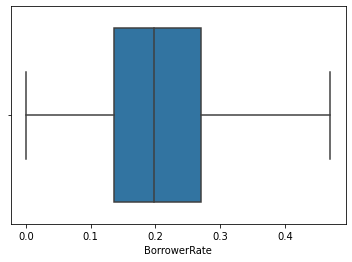

In [309]:
sns.boxplot(x = 'BorrowerRate', data = df_filter)

---------------------------------------------------------------------------------------------------------------------------------------------------------

In [310]:
# ['AmountDelinquent',"BankcardUtilization","BorrowerAPR",'BorrowerRate','CreditGrade','CurrentDelinquencies','EmploymentStatus',
# 'EmploymentStatusDuration','LenderYield','LoanCurrentDaysDelinquent','LoanOriginalAmount','LoanStatus','MonthlyLoanPayment',
#  'ProsperScore', 'Term', 

*'CurrentDelinquencies'

<AxesSubplot:xlabel='CurrentDelinquencies'>

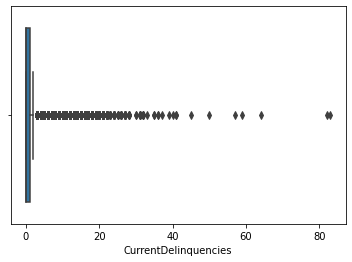

In [311]:
sns.boxplot(df_filter['CurrentDelinquencies'])

In [313]:
# List of numerical columns to check for outliers
numerical_columns = ['CurrentDelinquencies','EmploymentStatus','LenderYield','LoanOriginalAmount','MonthlyLoanPayment','ProsperScore']

# Loop through each numerical column
for column in numerical_columns:
    # Calculate the IQR for the current column
    Q1 = df_filter[column].quantile(0.25)
    Q3 = df_filter[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds for outliers
    lowertail = Q1 - 1.5 * IQR
    uppertail = Q3 + 1.5 * IQR
    
    # Identify and remove outliers
    outliers = df_filter.loc[(df_filter[column]<=uppertail) & (df_filter[column]>=lowertail)]
    df_filter.drop(outliers.index, axis=0)
    
    mean_data = df_filter.loc[(df_filter[column]<=uppertail) & (df_filter[column]>=lowertail),column].mean()
    mean_data = int(np.ceil(mean_data))
    
    # outliers handling
    df_filter.loc[(df_filter[column]>uppertail),column] = mean_data
    
    

# Print the cleaned DataFrame
print(df_filter)
mean_data


        ListingCreationDate  CreditGrade  Term  LoanStatus  BorrowerAPR  \
0                      4506            3    36           0      0.16516   
2                       371            6    36           0      0.28269   
11                    13671            3    36           0      0.15033   
12                      556            3    36           0      0.17969   
15                     7065            3    36           0      0.35797   
...                     ...          ...   ...         ...          ...   
113927                12108            1    36           0      0.07469   
113928                 1318            3    36           0      0.22362   
113929                19229            3    36           0      0.30285   
113933                20637            3    36           0      0.13220   
113935                 8831            3    60           0      0.28408   

        BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0             0.1580  

6

In [314]:
# Capping

IQR = q3-q1
print ("IQR  :: ",IQR) 

IQR  ::  0.13339999999999996


In [315]:
def capping(x):
    if x < lowertail:
        x = lowertail
        return x
    elif x > uppertail:
        x = uppertail
        return x
    else:
        return x

In [316]:
df_filter.CurrentDelinquencies = df_filter.CurrentDelinquencies.apply(capping)

<AxesSubplot:xlabel='CurrentDelinquencies'>

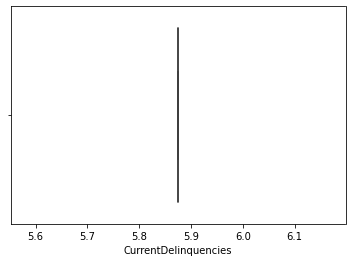

In [317]:
sns.boxplot(x = 'CurrentDelinquencies', data = df_filter)

<AxesSubplot:xlabel='EmploymentStatus'>

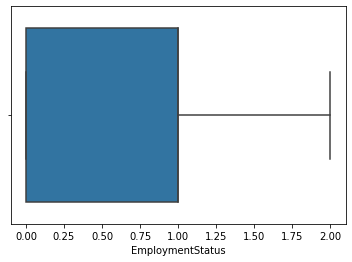

In [318]:
sns.boxplot(x = 'EmploymentStatus', data = df_filter)

In [319]:
df_filter.LenderYield = df_filter.LenderYield.apply(capping)

<AxesSubplot:xlabel='LenderYield'>

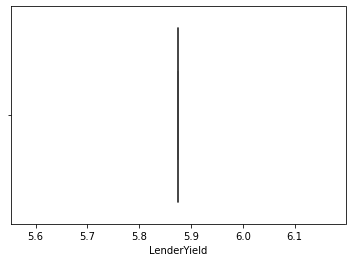

In [320]:
sns.boxplot(x = 'LenderYield', data = df_filter)

In [322]:
# df_filter.LoanCurrentDaysDelinquent = df_filter.LoanCurrentDaysDelinquent.apply(capping)

In [324]:
# sns.boxplot(x = 'LoanCurrentDaysDelinquent', data = df_filter)

In [325]:
df_filter.LoanOriginalAmount = df_filter.LoanOriginalAmount.apply(capping)

<AxesSubplot:xlabel='LoanOriginalAmount'>

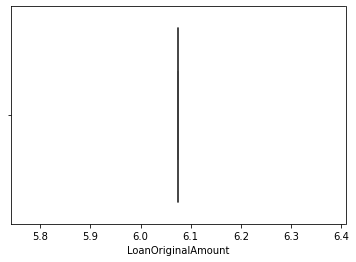

In [326]:
sns.boxplot(x = 'LoanOriginalAmount', data = df_filter)

In [327]:
df_filter.MonthlyLoanPayment = df_filter.MonthlyLoanPayment.apply(capping)

<AxesSubplot:xlabel='MonthlyLoanPayment'>

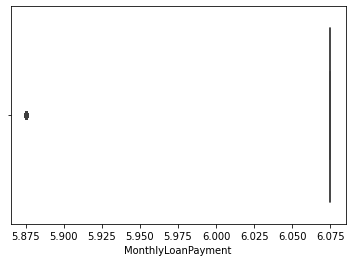

In [328]:
sns.boxplot(x = 'MonthlyLoanPayment', data = df_filter)

In [329]:
df_filter.ProsperScore = df_filter.ProsperScore.apply(capping)

<AxesSubplot:xlabel='ProsperScore'>

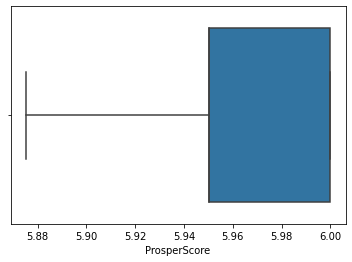

In [330]:
sns.boxplot(x = 'ProsperScore', data = df_filter)

In [331]:
# checking final output of removed outliers from selected columns 
# ['BorrowerAPR','BankcardUtilization','BorrowerRate','CurrentDelinquencies','EmploymentStatus','LenderYield',
#'LoanCurrentDaysDelinquent','LoanOriginalAmount','MonthlyLoanPayment','ProsperScore']

outliers_columns.value_counts()

True     51
False    13
dtype: int64

---------------------------------------------------------------------------------------------------------------------------------------------------------

#### 4.0 Mutual Information

In [332]:
X = df_filter.copy()
y = X.pop("LoanStatus")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

##### 4.1 mutual_info_regression

In [333]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="Mutual Information Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

LP_GrossPrincipalLoss        0.476009
LP_CustomerPayments          0.129940
BorrowerRate                 0.048867
EstimatedEffectiveYield      0.036157
CreditScoreRangeUpper        0.027922
LoanOriginationQuarter       0.025455
DateCreditPulled             0.021839
ProsperRating (Alpha)        0.017825
ProsperScore                 0.015932
StatedMonthlyIncome          0.011878
AmountDelinquent             0.009204
ListingCategory (numeric)    0.008403
OpenCreditLines              0.006908
OpenRevolvingAccounts        0.004369
DebtToIncomeRatio            0.003788
PublicRecordsLast10Years     0.003227
EmploymentStatus             0.002697
Term                         0.001843
DelinquenciesLast7Years      0.001182
CurrentDelinquencies         0.000000
LenderYield                  0.000000
Name: Mutual Information Scores, dtype: float64

##### 4.2 mutual_info_classif

Choosing K best 20 features from Feature selection using Mutual information 

In [334]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

sel_five_cols = SelectKBest(mutual_info_classif, k=20)
sel_five_cols.fit(X, y)
selected_data = X.columns[sel_five_cols.get_support()]
selected_data

Index(['CreditGrade', 'BorrowerAPR', 'BorrowerRate', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'DateCreditPulled', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'LoanMonthsSinceOrigination',
       'LoanOriginationDate', 'LoanOriginationQuarter', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'LP_CollectionFees',
       'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments'],
      dtype='object')

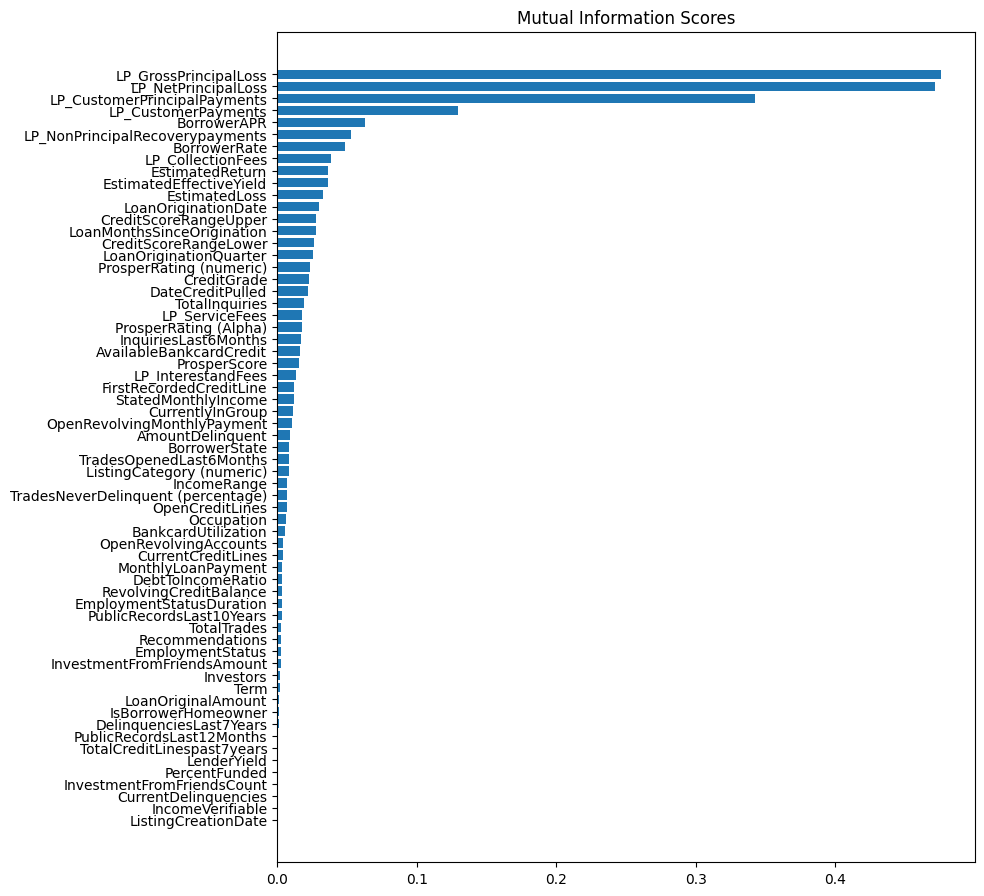

In [335]:
# And now a bar plot to make comparisions easier:

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(9, 11))
plot_mi_scores(mi_scores)

* #### Observation :
1. Data visualization is a great follow-up to a utility ranking. Let's take a closer look at a couple of these.
2. As we might expect, the high-scoring "Prosperscore" feature exhibits a strong relationship with target column(LoanStatus)

In [ ]:
# sns.relplot(x="ClosedDate", y="LoanStatus", data=df_filter);

ValueError: Could not interpret value `ClosedDate` for parameter `x`

In [ ]:
# plt.figure(dpi=100, figsize=(15, 11))
# sns.lmplot(x="LP_CustomerPrincipalPayments", y="LoanStatus", hue="ClosedDate", data=df_filter);

columns we should drop doesn't required  

In [ ]:
# ['ListingKey','ListingNumber','ListingCreationDate','Term','closedDate,'BorrowerState',EmploymentStatusDuration,IsBorrowerHomeowner,
# GroupKey,DateCreditPulled,BankcardUtilization,AvailableBankcardCredit]

# ['Occupation' & 'EmploymentStatus'] this two columns i'm confused drop it or concatenate    

---------------------------------------------------------------------------------------------------------------------------------------------------------

#### 5.0 Feature Scaling

In [ ]:
# before Perform PCA we have to do Feature Scaling that is (Scaling, Normalization and Standardization)

In [337]:
df_filter.head()

ListingCreationDate  CreditGrade  Term  LoanStatus  BorrowerAPR  \
0                  4506            3    36           0      0.16516   
2                   371            6    36           0      0.28269   
11                13671            3    36           0      0.15033   
12                  556            3    36           0      0.17969   
15                 7065            3    36           0      0.35797   

    BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0         0.1580     5.875166                 0.168661       0.080306   
2         0.2750     5.875166                 0.168661       0.080306   
11        0.1325     5.875166                 0.168661       0.080306   
12        0.1435     5.875166                 0.126400       0.052400   
15        0.3177     5.875166                 0.289600       0.165000   

    EstimatedReturn  ProsperRating (numeric)  ProsperRating (Alpha)  \
0          0.096068                 4.072243                      3   
2          0.096068                 4.072243                      3   
11         0.096068                 4.072243                      3   
12         0.074000                 5.000000                      2   
15         0.124600                 1.000000                      6   

    ProsperScore  ListingCategory (numeric)  BorrowerState  Occupation  \
0       5.950067                          0              5          35   
2       5.950067                          0             10          35   
11      5.950067                          0              4          66   
12      5.875166                          1              1          48   
15      5.875166                         13              9          35   

    EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0                  1                  2.000000                 True   
2                  2                 96.071582                False   
11                 1                 19.000000                False   
12                 0                  1.000000                False   
15                 1                121.000000                 True   

    CurrentlyInGroup  DateCreditPulled  CreditScoreRangeLower  \
0               True             29940                  640.0   
2               True              2975                  480.0   
11             False             14031                  640.0   
12             False             11869                  680.0   
15             False             27170                  700.0   

    CreditScoreRangeUpper  FirstRecordedCreditLine  CurrentCreditLines  \
0                   659.0                      855            5.000000   
2                   499.0                     7539           10.317192   
11                  659.0                     1710            2.000000   
12                  699.0                     2333            9.000000   
15                  719.0                     4636           10.000000   

    OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
0          4.000000                        12.0                      1   
2          9.260164                         3.0                      0   
11         2.000000                        10.0                      1   
12         7.000000                        29.0                      8   
15         9.000000                        18.0                      5   

    OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
0                            24                   3.0             3.0   
2                             0                   0.0             1.0   
11                           40                   3.0             5.0   
12                          290                   1.0             4.0   
15                          300                   0.0             1.0   

    CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
0               5.875166        472.000000      

---------------------------------------------------------------------------------------------------------------------------------------------------------

### Train test split

In [338]:
# for feature scaling we need to first perform train test split

In [339]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_filter.drop('LoanStatus', axis=1),
                                                    df_filter['LoanStatus'],
                                                    test_size = 0.3,
                                                    random_state = 0)

X_train.shape, X_test.shape

((40126, 63), (17198, 63))

---------------------------------------------------------------------------------------------------------------------------------------------------------

#### 5.1 StandardScaler

In [340]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the tarin set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [341]:
scaler.mean_

array([ 1.45053363e+04,  3.02175647e+00,  3.71992224e+01,  2.23924613e-01,
        2.01626607e-01,  5.87516646e+00,  1.73722002e-01,  8.71727561e-02,
        1.01861928e-01,  3.85633173e+00,  3.14511788e+00,  5.95105776e+00,
        2.48542092e+00,  2.02819120e+01,  3.12830085e+01,  7.31520710e-01,
        8.34236500e+01,  4.70841848e-01,  2.05427902e-01,  2.37180125e+04,
        6.72872937e+02,  6.91872937e+02,  4.78201029e+03,  9.67519252e+00,
        8.47531937e+00,  2.53458664e+01,  6.10000997e+00,  3.27196356e+02,
        1.99461849e+00,  6.97295899e+00,  5.87516646e+00,  1.04378403e+03,
        4.55333086e+00,  3.27389266e-01,  2.22722624e-02,  1.60556698e+04,
        5.34446233e-01,  1.07357647e+04,  2.19996951e+01,  8.61290685e-01,
        8.89512494e-01,  2.87597455e-01,  3.60177939e+00,  9.20849325e-01,
        5.04692095e+03,  5.39051239e+01,  6.07490012e+00,  9.52359717e+02,
        1.54383691e+01,  6.07147549e+00,  5.83108025e+03,  4.68050622e+03,
        1.15057404e+03, -

In [342]:
# convert X_train_scaled into DataFrame because scaled output is an arry form so i need to visualize in the form of dataframe
 
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [343]:
X_train_scaled

ListingCreationDate  CreditGrade      Term  BorrowerAPR  BorrowerRate  \
0                -0.419151     1.496718 -0.156608     0.469499      0.596592   
1                -1.186140     0.740128 -0.156608     0.838643      1.089915   
2                 1.619826    -0.016461 -0.156608     0.924512      0.842020   
3                -1.353352    -0.016461 -0.156608    -1.036042     -1.111537   
4                -0.742404    -2.286228 -0.156608    -0.989245     -0.973407   
...                    ...          ...       ...          ...           ...   
40121            -0.519334    -0.016461 -0.156608     0.678946      0.537394   
40122            -1.693422     0.740128 -0.156608    -0.701654     -0.575049   
40123             0.191557    -0.016461 -0.156608     0.747550      0.610159   
40124             0.203929    -0.773050 -0.156608    -0.473466     -0.328388   
40125            -0.852437     1.496718 -0.156608    -0.123971     -0.087893   

        LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0      8.881784e-16                -0.088929      -0.177379        -0.214823   
1      8.881784e-16                -0.088929      -0.177379        -0.214823   
2      8.881784e-16                 1.400180       0.641312         1.466040   
3      8.881784e-16                -1.889482      -1.347673        -1.322315   
4      8.881784e-16                -0.088929      -0.177379        -0.214823   
...             ...                      ...            ...              ...   
40121  8.881784e-16                 0.978429       0.822128         0.316585   
40122  8.881784e-16                -0.088929      -0.177379        -0.214823   
40123  8.881784e-16                 1.080352       0.641312         0.791198   
40124  8.881784e-16                -0.088929      -0.177379        -0.214823   
40125  8.881784e-16                -0.088929      -0.177379        -0.214823   

       ProsperRating (numeric)  ProsperRating (Alpha)  ProsperScore  \
0                     0.168527              -0.107775     -0.023167   
1                     0.168527              -0.107775     -0.023167   
2                    -0.668400               0.634896     -1.773862   
3                     1.673217              -2.335788      1.143962   
4                     0.168527              -0.107775     -0.023167   
...                        ...                    ...           ...   
40121                -0.668400               0.634896     -1.773862   
40122                 0.168527              -0.107775     -0.023167   
40123                -0.668400               0.634896      1.143962   
40124                 0.168527              -0.107775     -0.023167   
40125                 0.168527              -0.107775     -0.023167   

       ListingCategory (numeric)  BorrowerState  Occupation  EmploymentStatus  \
0                      -0.709784       0.245732    1.706667          0.434893   
1                      -0.709784      -1.076086   -1.803094          0.434893   
2                      -0.424205      -0.216905   -0.263725         -1.184944   
3                      -0.424205      -1.076086   -0.817898         -1.184944   
4                      -0.424205      -0.282995   -1.248922          0.434893   
...                          ...            ...         ...               ...   
40121                  -0.138626       1.171004    0.228873          0.434893   
40122                   0.432532       0.179641   -1.926244          0.434893   
40123                  -0.138626       1.765823   -1.187347         -1.184944   
40124                  -0.709784      -1.076086   -1.803094          0.434893   
40125                  -0.709784      -1.076086    1.152494          0.434893   

       EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup  \
0                     -1.050626             1.060120          1.966695   
1                      0.057634            -0.943289         -0.508467   
2                      0.309511      

In [344]:
X_test_scaled

ListingCreationDate  CreditGrade      Term  BorrowerAPR  BorrowerRate  \
0                 0.977285    -1.529639 -0.156608    -1.238900     -1.155937   
1                 0.849593    -2.286228 -0.156608    -1.592711     -1.623360   
2                 1.443364    -0.773050 -0.156608    -1.045015     -0.946274   
3                -0.850035    -0.773050 -0.156608    -1.066595     -0.969707   
4                 1.102454    -0.016461  2.977592     1.073987      1.109648   
...                    ...          ...       ...          ...           ...   
17193             0.495349    -1.529639 -0.156608    -1.328972     -1.253368   
17194            -0.081724    -0.773050 -0.156608    -1.128952     -1.123871   
17195            -0.375667    -0.773050 -0.156608     0.182930      0.288266   
17196            -1.131244    -0.016461 -0.156608    -0.719713     -0.772378   
17197             1.479161    -1.529639 -0.156608    -0.941881     -0.761278   

        LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0      8.881784e-16                -0.088929      -0.177379        -0.214823   
1      8.881784e-16                -0.088929      -0.177379        -0.214823   
2      8.881784e-16                -0.088929      -0.177379        -0.214823   
3      8.881784e-16                -0.088929      -0.177379        -0.214823   
4      8.881784e-16                 1.456414       1.170846         0.824570   
...             ...                      ...            ...              ...   
17193  8.881784e-16                -0.088929      -0.177379        -0.214823   
17194  8.881784e-16                -0.088929      -0.177379        -0.214823   
17195  8.881784e-16                -0.088929      -0.177379        -0.214823   
17196  8.881784e-16                -0.794686      -1.270180        -0.421291   
17197  8.881784e-16                -0.088929      -0.177379        -0.214823   

       ProsperRating (numeric)  ProsperRating (Alpha)  ProsperScore  \
0                     0.168527              -0.107775     -0.023167   
1                     0.168527              -0.107775     -0.023167   
2                     0.168527              -0.107775     -0.023167   
3                     0.168527              -0.107775     -0.023167   
4                    -1.448939               1.377567     -1.773862   
...                        ...                    ...           ...   
17193                 0.168527              -0.107775     -0.023167   
17194                 0.168527              -0.107775     -0.023167   
17195                 0.168527              -0.107775     -0.023167   
17196                 1.673217              -2.335788      1.143962   
17197                 0.168527              -0.107775     -0.023167   

       ListingCategory (numeric)  BorrowerState  Occupation  EmploymentStatus  \
0                      -0.709784      -0.745632    0.228873          0.434893   
1                       0.432532       0.179641    1.029345          0.434893   
2                      -0.709784      -1.076086   -0.756323          2.054729   
3                      -0.424205      -1.076086    0.105723          0.434893   
4                      -0.424205      -1.076086   -1.803094         -1.184944   
...                          ...            ...         ...               ...   
17193                   1.289269      -0.745632    0.598322          0.434893   
17194                   1.289269       0.972732    1.152494          0.434893   
17195                  -0.424205      -1.076086    0.228873          0.434893   
17196                  -0.424205       0.906641    0.228873         -1.184944   
17197                   0.146953       1.501459    0.352022          0.434893   

       EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup  \
0                     -0.949875             1.060120         -0.508467   
1                     -0.106086            -0.943289         -0.508467   
2                      0.159286      

---------------------------------------------------------------------------------------------------------------------------------------------------------

#### 5.2 Normalization

In [345]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
minmaxscaler.fit(X_train)

# transform train and test sets
X_train_minmaxscaled = minmaxscaler.transform(X_train)
X_test_minmaxscaled = minmaxscaler.transform(X_test)

In [346]:
X_train_minmaxscaled = pd.DataFrame(X_train_minmaxscaled, columns=X_train.columns)
X_test_minmaxscaled = pd.DataFrame(X_test_minmaxscaled, columns=X_test.columns)

In [347]:
X_train_minmaxscaled

ListingCreationDate  CreditGrade  Term  BorrowerAPR  BorrowerRate  \
0                 0.381018     0.714286   0.5     0.511149      0.531915   
1                 0.160176     0.571429   0.5     0.575885      0.617021   
2                 0.968110     0.428571   0.5     0.590943      0.574255   
3                 0.112030     0.428571   0.5     0.247129      0.237234   
4                 0.287943     0.000000   0.5     0.255336      0.261064   
...                    ...          ...   ...          ...           ...   
40121             0.352172     0.428571   0.5     0.547879      0.521702   
40122             0.014112     0.571429   0.5     0.305769      0.329787   
40123             0.556862     0.428571   0.5     0.559910      0.534255   
40124             0.560425     0.285714   0.5     0.345786      0.372340   
40125             0.256260     0.714286   0.5     0.407075      0.413830   

       LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0              0.0                 0.698428       0.208823         0.596751   
1              0.0                 0.698428       0.208823         0.596751   
2              0.0                 0.867398       0.296594         0.694176   
3              0.0                 0.494118       0.083356         0.532560   
4              0.0                 0.698428       0.208823         0.596751   
...            ...                      ...            ...              ...   
40121          0.0                 0.819541       0.315979         0.627552   
40122          0.0                 0.698428       0.208823         0.596751   
40123          0.0                 0.831107       0.296594         0.655061   
40124          0.0                 0.698428       0.208823         0.596751   
40125          0.0                 0.698428       0.208823         0.596751   

       ProsperRating (numeric)  ProsperRating (Alpha)  ProsperScore  \
0                     0.512040               0.500000           0.6   
1                     0.512040               0.500000           0.6   
2                     0.333333               0.666667           0.0   
3                     0.833333               0.000000           1.0   
4                     0.512040               0.500000           0.6   
...                        ...                    ...           ...   
40121                 0.333333               0.666667           0.0   
40122                 0.512040               0.500000           0.6   
40123                 0.333333               0.666667           1.0   
40124                 0.512040               0.500000           0.6   
40125                 0.512040               0.500000           0.6   

       ListingCategory (numeric)  BorrowerState  Occupation  EmploymentStatus  \
0                           0.00           0.48    0.893939               0.5   
1                           0.00           0.08    0.030303               0.5   
2                           0.05           0.34    0.409091               0.0   
3                           0.05           0.08    0.272727               0.0   
4                           0.05           0.32    0.166667               0.5   
...                          ...            ...         ...               ...   
40121                       0.10           0.76    0.530303               0.5   
40122                       0.20           0.46    0.000000               0.5   
40123                       0.10           0.94    0.181818               0.0   
40124                       0.00           0.08    0.030303               0.5   
40125                       0.00           0.08    0.757576               0.5   

       EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup  \
0                      0.000000                  1.0               1.0   
1                      0.116556                  0.0               0.0   
2                      0.143046                  1.0               0.0   
3                      

In [348]:
X_test_minmaxscaled

ListingCreationDate  CreditGrade  Term  BorrowerAPR  BorrowerRate  \
0                 0.783100     0.142857   0.5     0.211555      0.229574   
1                 0.746334     0.000000   0.5     0.149509      0.148936   
2                 0.917301     0.285714   0.5     0.245556      0.265745   
3                 0.256952     0.285714   0.5     0.241771      0.261702   
4                 0.819141     0.428571   1.0     0.617156      0.620426   
...                    ...          ...   ...          ...           ...   
17193             0.644335     0.142857   0.5     0.195759      0.212766   
17194             0.478175     0.285714   0.5     0.230836      0.235106   
17195             0.393539     0.285714   0.5     0.460895      0.478723   
17196             0.175982     0.428571   0.5     0.302602      0.295745   
17197             0.927608     0.142857   0.5     0.263642      0.297660   

       LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0              0.0                 0.698428       0.208823         0.596751   
1              0.0                 0.698428       0.208823         0.596751   
2              0.0                 0.698428       0.208823         0.596751   
3              0.0                 0.698428       0.208823         0.596751   
4              0.0                 0.873779       0.353365         0.656995   
...            ...                      ...            ...              ...   
17193          0.0                 0.698428       0.208823         0.596751   
17194          0.0                 0.698428       0.208823         0.596751   
17195          0.0                 0.698428       0.208823         0.596751   
17196          0.0                 0.618345       0.091664         0.584784   
17197          0.0                 0.698428       0.208823         0.596751   

       ProsperRating (numeric)  ProsperRating (Alpha)  ProsperScore  \
0                     0.512040               0.500000           0.6   
1                     0.512040               0.500000           0.6   
2                     0.512040               0.500000           0.6   
3                     0.512040               0.500000           0.6   
4                     0.166667               0.833333           0.0   
...                        ...                    ...           ...   
17193                 0.512040               0.500000           0.6   
17194                 0.512040               0.500000           0.6   
17195                 0.512040               0.500000           0.6   
17196                 0.833333               0.000000           1.0   
17197                 0.512040               0.500000           0.6   

       ListingCategory (numeric)  BorrowerState  Occupation  EmploymentStatus  \
0                           0.00           0.18    0.530303               0.5   
1                           0.20           0.46    0.727273               0.5   
2                           0.00           0.08    0.287879               1.0   
3                           0.05           0.08    0.500000               0.5   
4                           0.05           0.08    0.030303               0.0   
...                          ...            ...         ...               ...   
17193                       0.35           0.18    0.621212               0.5   
17194                       0.35           0.70    0.757576               0.5   
17195                       0.05           0.08    0.530303               0.5   
17196                       0.05           0.68    0.530303               0.0   
17197                       0.15           0.86    0.560606               0.5   

       EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup  \
0                      0.010596                  1.0               0.0   
1                      0.099338                  0.0               0.0   
2                      0.127247                  0.0               1.0   
3                      

---------------------------------------------------------------------------------------------------------------------------------------------------------

>  ### 6.0 Feature Selection

![Alt text](https://www.kdnuggets.com/wp-content/uploads/Fig2-Butvinik-feature-selection-overview.jpg)

#### 6.1 Principal Component Analysis (PCA)

* Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets,
increasing interpretability but at the same time minimizing information loss.

##### Steps in this section:
* Dimensionality reduction with PCA
* Plotting the reduced dataframe


In [349]:
from sklearn.decomposition import PCA

# Assume X is your dataset, where each row represents an observation and each column represents a feature
# Set the number of principal components you want to keep
num_components = 40

# Create a PCA object with the desired number of components
pca = PCA(n_components=num_components)

# Fit the PCA object to your dataset
pca.fit(df_filter)

# Transform your dataset using the PCA object
X_transformed = pca.transform(df_filter)

# The first num_components columns of X_transformed represent the principal components, which are your new features


In [350]:
X_transformed

array([[-1.74700497e+04, -5.02711315e+03,  5.76353290e+03, ...,
        -9.30462936e-02, -2.67551323e-01, -1.29556777e-01],
       [ 1.57348008e+03,  1.94630282e+02, -2.11409736e+04, ...,
        -4.31238829e-01, -4.20092110e-01, -1.95493011e-01],
       [-1.65343852e+04, -4.80529924e+03, -9.79960121e+03, ...,
         3.99575035e-01, -3.57715222e-01, -2.70279273e-01],
       ...,
       [-1.54518419e+04, -2.78495735e+02,  1.91942277e+04, ...,
         4.06256798e-01, -4.13589453e-01, -1.25245176e-01],
       [-1.14565346e+03, -3.94465529e+03, -1.30465539e+04, ...,
         1.05892766e+00, -2.91669418e-01,  2.57942135e-02],
       [-4.65959494e+03, -4.25166440e+03, -1.50039071e+04, ...,
         3.49874302e-01,  6.95864891e-01,  1.68296767e-01]])

### 7.0 Filter Method Feature Selection

#### 7.1 Pearson correlation coefficients

In [351]:
# Separate features and target variable
X = df_filter.drop('LoanStatus', axis=1)
y = df_filter['LoanStatus']

# Calculate Pearson correlation coefficients
corr = X.corr()

# Select features with correlation greater than a threshold
threshold = 0.5
selected_features = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname = corr.columns[i]
            selected_features.append(colname)

# Print the selected features
print(selected_features)

['BorrowerRate', 'EstimatedEffectiveYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedLoss', 'EstimatedLoss', 'EstimatedReturn', 'EstimatedReturn', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (numeric)', 'ProsperRating (numeric)', 'ProsperRating (numeric)', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperRating (Alpha)', 'ProsperRating (Alpha)', 'ProsperRating (Alpha)', 'ProsperRating (Alpha)', 'ProsperRating (Alpha)', 'ProsperScore', 'ProsperScore', 'ProsperScore', 'ProsperScore', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CreditScoreRangeUpper', 'OpenCreditLines', 'TotalCreditLinespast7years', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingAccounts', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'OpenRevolvingMonthlyPayment', 'OpenRevolvingMonthlyPayment', 'TotalInquiries', 'RevolvingCreditBalance', 'TotalTrades', 'TotalTrades', 'TotalTrades', 'TotalTrades', 'LoanMonthsSinceOrigination', 'LP_CustomerPrin

In [352]:
# Result of Pearson Pearson Correlation :

['ListingCreationDate', 'ClosedDate', 'BorrowerRate', 'EstimatedEffectiveYield','EstimatedLoss', 'EstimatedReturn',
'ProsperRating (numeric)','ProsperRating (Alpha)', 'ProsperScore', 'EmploymentStatus', 'DateCreditPulled','CreditScoreRangeLower',
'CreditScoreRangeUpper', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
'TotalInquiries', 'RevolvingCreditBalance', 'TotalTrades','LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginationDate',
'LP_CustomerPrincipalPayments', 'LP_Interestandf_filterees','LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'InvestmentFromFriendsCount', 'Investors']

['ListingCreationDate',
 'ClosedDate',
 'BorrowerRate',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'EmploymentStatus',
 'DateCreditPulled',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'TotalInquiries',
 'RevolvingCreditBalance',
 'TotalTrades',
 'LoanMonthsSinceOrigination',
 'LoanNumber',
 'LoanOriginationDate',
 'LP_CustomerPrincipalPayments',
 'LP_Interestandf_filterees',
 'LP_NetPrincipalLoss',
 'LP_NonPrincipalRecoverypayments',
 'InvestmentFromFriendsCount',
 'Investors']

#### 7.2 Using Variance Threshold
Variance threshold from sklearn is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples.

In [353]:
# Variance method
# removing features that show the same value for the majority/all of the observations (constant/quasi-constant features)
# It is good practice to select the features by examining only the training set to avoid overfitting.

In [354]:
from sklearn.feature_selection import VarianceThreshold


varModel=VarianceThreshold(threshold=0) #Setting variance threshold to 0 which means features that have same value in all samples.
varModel.fit(X_train)

VarianceThreshold(threshold=0)

In [355]:
constArr=varModel.get_support()
constArr
#get_support() return True and False value for each feature.
#True: Not a constant feature
#False: Constant feature(It contains same value in all samples.)

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [356]:
import collections
#To find total number of constant and non constant features we will be using collections.Counter function.
collections.Counter(constArr)
#Non Constant feature:66
#Constant feature: 4

Counter({True: 60, False: 3})

In [357]:
"""We can see there are 4 features/columns having constant value. This mean they have same value in all samples. Lets proof that,
by selecting some of the constant features and print out value counts. We can also use unique method."""

'We can see there are 4 features/columns having constant value. This mean they have same value in all samples. Lets proof that,\nby selecting some of the constant features and print out value counts. We can also use unique method.'

In [358]:
#Print out constant feature name
constCol=[col for col in X_train.columns if col not in X_train.columns[constArr]]
constCol

['LenderYield', 'CurrentDelinquencies', 'LoanOriginalAmount']

#### 7.3 correlation coefficient

In [359]:
# Filter method using the "correlation coefficient"

# Separate the features and target variable
X = df_filter.drop('LoanStatus', axis=1)
y = df_filter['LoanStatus']

# Calculate the correlation matrix
corr_matrix = X.corr()

# Select highly correlated features
corr_threshold = 0.7
highly_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            if colname_i not in highly_corr_features and colname_j not in highly_corr_features:
                highly_corr_features.add(colname_i)

# Remove highly correlated features
X_filtered = X.drop(highly_corr_features, axis=1)

# Print the remaining features
print(X_filtered.columns)


Index(['ListingCreationDate', 'CreditGrade', 'Term', 'BorrowerAPR',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'DateCreditPulled',
       'FirstRecordedCreditLine', 'CurrentCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'CurrentDelinquencies', 'AmountDelinquent',
       'DelinquenciesLast7Years', 'PublicRecordsLast10Years',
       'PublicRecordsLast12Months', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TradesNeverDelinquent (percentage)',
       'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'IncomeRange',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanMonthsSinceOrigination',
       'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter',
       'MonthlyLoanPayment', 'LP_Custo

### 8.0 Feature Importance

* In Machine Learning, The purpose of feature selection is to discover the best set of characteristic that allows one to devlop usable models of the phenomena being examined.

* we can get the feature importance of each feature of your dataset by using the feature importance property of the model.

* Feature importance gives us a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

* Feature importance is an inbuilt class that comes with Tree Based regressor, we will be using Extra Tree regressor for extracting the top 20 features for the dataset

#### 8.1 ExtraTreesRegressor

In [360]:
# Feature selection using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y) # train model


ExtraTreesRegressor()

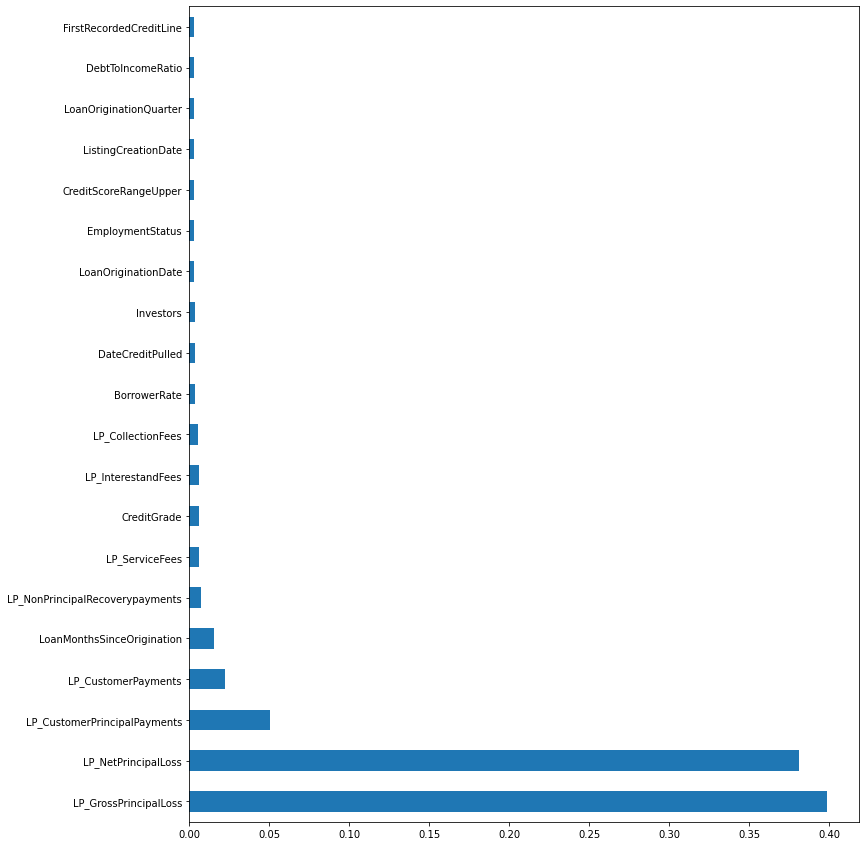

In [361]:
 # plot graph of important features
 
plt.figure(figsize=(12,15))
feat_importances=pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.style.use('dark_background')
plt.rcParams.update({'text.color':'white'})
plt.show()


In [362]:
from sklearn.feature_selection import f_classif  # 
f_val ,p_val = f_classif(X,y)
df_filter1 = pd.DataFrame({"chi_sq":f_val,"P_val":np.around(p_val,5)},index= X.columns)
df_filter1

chi_sq    P_val
ListingCreationDate                     0.162295  0.68705
CreditGrade                          1656.321185  0.00000
Term                                   19.010746  0.00001
BorrowerAPR                          2038.555560  0.00000
BorrowerRate                         2814.654914  0.00000
LenderYield                            36.302723  0.00000
EstimatedEffectiveYield               912.013317  0.00000
EstimatedLoss                         491.767228  0.00000
EstimatedReturn                       462.606785  0.00000
ProsperRating (numeric)               533.351691  0.00000
ProsperRating (Alpha)                 615.260894  0.00000
ProsperScore                          323.488654  0.00000
ListingCategory (numeric)             253.044967  0.00000
BorrowerState                          43.367918  0.00000
Occupation                            108.904811  0.00000
EmploymentStatus                      788.582852  0.00000
EmploymentStatusDuration                9.645165  0.00190
IsBorrowerHomeowner                    44.110219  0.00000
CurrentlyInGroup                      591.217137  0.00000
DateCreditPulled                       18.262589  0.00002
CreditScoreRangeLower                3216.099113  0.00000
CreditScoreRangeUpper                3216.099113  0.00000
FirstRecordedCreditLine                 5.392799  0.02022
CurrentCreditLines                     64.173250  0.00000
OpenCreditLines                        67.366188  0.00000
TotalCreditLinespast7years             13.369442  0.00026
OpenRevolvingAccounts                 261.653506  0.00000
OpenRevolvingMonthlyPayment             7.847000  0.00509
InquiriesLast6Months                 2160.269085  0.00000
TotalInquiries                       2108.211355  0.00000
CurrentDelinquencies                   36.302723  0.00000
AmountDelinquent                       53.341332  0.00000
DelinquenciesLast7Years               438.553315  0.00000
PublicRecordsLast10Years              516.596553  0.00000
PublicRecordsLast12Months              86.859365  0.00000
RevolvingCreditBalance                  0.738314  0.39021
BankcardUtilization                   151.117087  0.00000
AvailableBankcardCredit               462.256875  0.00000
TotalTrades                            61.623280  0.00000
TradesNeverDelinquent (percentage)    946.683362  0.00000
TradesOpenedLast6Months               524.913359  0.00000
DebtToIncomeRatio                     126.088913  0.00000
IncomeRange                             3.942680  0.04708
IncomeVerifiable                       38.375711  0.00000
StatedMonthlyIncome                   222.937893  0.00000
LoanMonthsSinceOrigination           1519.273882  0.00000
LoanOriginalAmount                     -7.341445      NaN
LoanOriginationDate                    16.826677  0.00004
LoanOriginationQuarter                175.891626  0.00000
MonthlyLoanPayment                    160.585255  0.00000
LP_CustomerPayments                  6411.932533  0.00000
LP_CustomerPrincipalPayments         8576.747393  0.00000
LP_InterestandFees                     25.207154  0.00000
LP_ServiceFees                        520.936800  0.00000
LP_CollectionFees                    1256.436496  0.00000
LP_GrossPrincipalLoss               35025.903472  0.00000
LP_NetPrincipalLoss                 34529.411502  0.00000
LP_NonPrincipalRecoverypayments      2076.910152  0.00000
PercentFunded                           3.767812  0.05225
Recommendations                         0.374855  0.54037
InvestmentFromFriendsCount             12.240217  0.00047
InvestmentFromFriendsAmount             0.469710  0.49312
Investors                              18.447294  0.00002

#### 8.2 Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

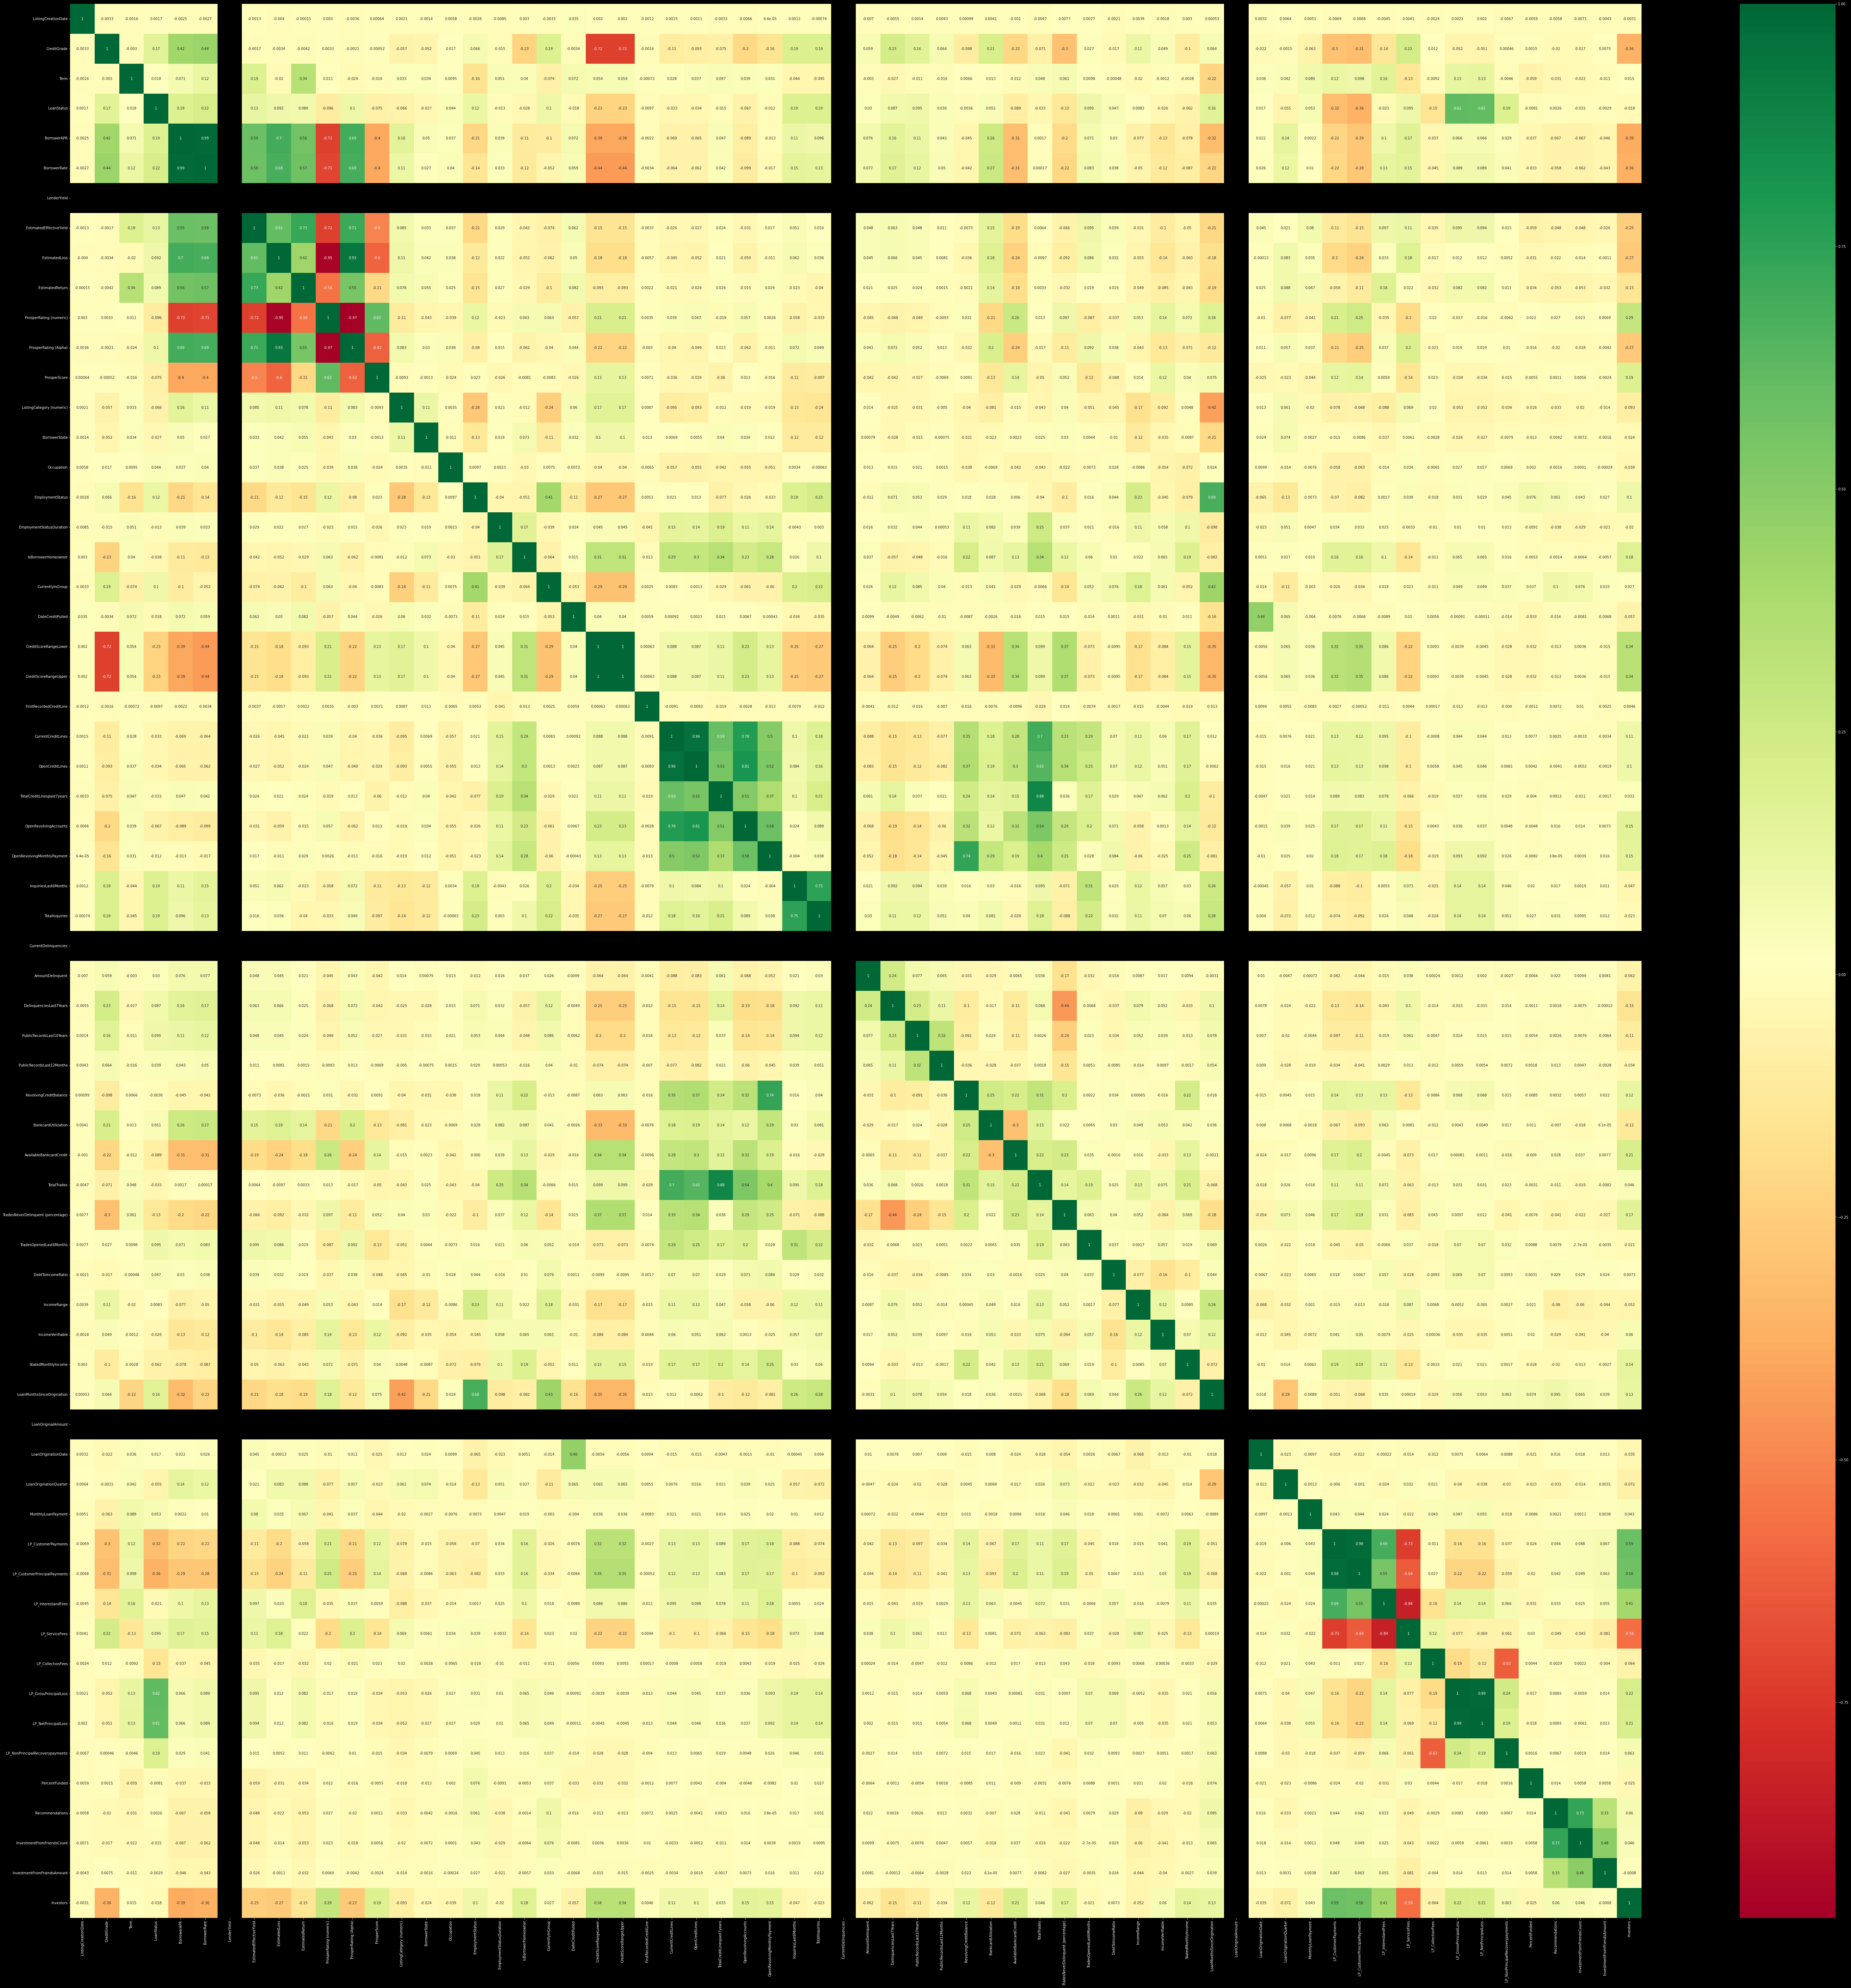

In [363]:
X = df_filter.iloc[:,0:20]  #independent columns
y = df_filter.iloc[:,-1]    #target column i.e LoanStatus
#get correlations of each features in dataset
corrmat = df_filter.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(100,100))
#plot heat map
g=sns.heatmap(df_filter[top_corr_features].corr(),annot=True,cmap="RdYlGn")

> #### Result :

##### as per my visualization on feature selection techniques that i've used
##### so as i concluded that This features we should drop from dataset 
##### (['LenderYield','CurrentDelinquencies','LoanCurrentDaysDelinquent','LoanOriginalAmount',
##### 'Closeddate','LoanOriginationDate',LoanMonthsSinceOrigination,ListingNumber, ListingCreationDate,LoanNumber,DateCreditPulled,ProsperRating (numeric),ProsperRating (Alpha)])

In [364]:
# initialize list of lists
remove_data = ['LenderYield','CurrentDelinquencies','LoanCurrentDaysDelinquent','LoanOriginalAmount','ClosedDate','LoanOriginationDate','LoanMonthsSinceOrigination','ListingNumber', 'ListingCreationDate','LoanNumber','DateCreditPulled','ProsperRating (numeric)','ProsperRating (Alpha)']
# Create the pandas DataFrame
removed_df_filter = pd.DataFrame(remove_data, columns=['Low Score Columns'])
  
# print DataFrame
removed_df_filter

Low Score Columns
0                  LenderYield
1         CurrentDelinquencies
2    LoanCurrentDaysDelinquent
3           LoanOriginalAmount
4                   ClosedDate
5          LoanOriginationDate
6   LoanMonthsSinceOrigination
7                ListingNumber
8          ListingCreationDate
9                   LoanNumber
10            DateCreditPulled
11     ProsperRating (numeric)
12       ProsperRating (Alpha)

#### 8.3 Removing unwanted Columns From DataFrame 

In [367]:
# Removing Multiple columns 
df_filter.drop(['LenderYield','CurrentDelinquencies','LoanOriginalAmount','LoanOriginationDate',
        'LoanMonthsSinceOrigination','ListingCreationDate','DateCreditPulled','ProsperRating (numeric)','ProsperRating (Alpha)','Occupation'], axis=1)

CreditGrade  Term  LoanStatus  BorrowerAPR  BorrowerRate  \
0                 3    36           0      0.16516        0.1580   
2                 6    36           0      0.28269        0.2750   
11                3    36           0      0.15033        0.1325   
12                3    36           0      0.17969        0.1435   
15                3    36           0      0.35797        0.3177   
...             ...   ...         ...          ...           ...   
113927            1    36           0      0.07469        0.0679   
113928            3    36           0      0.22362        0.1899   
113929            3    36           0      0.30285        0.2639   
113933            3    36           0      0.13220        0.1110   
113935            3    60           0      0.28408        0.2605   

        EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperScore  \
0                      0.168661       0.080306         0.096068      5.950067   
2                      0.168661       0.080306         0.096068      5.950067   
11                     0.168661       0.080306         0.096068      5.950067   
12                     0.126400       0.052400         0.074000      5.875166   
15                     0.289600       0.165000         0.124600      5.875166   
...                         ...            ...              ...           ...   
113927                 0.168661       0.080306         0.096068      5.950067   
113928                 0.175700       0.061000         0.114700      6.000000   
113929                 0.231800       0.122500         0.109300      5.875166   
113933                 0.100700       0.020000         0.080700      6.000000   
113935                 0.244500       0.085000         0.159500      5.875166   

        ListingCategory (numeric)  BorrowerState  EmploymentStatus  \
0                               0              5                 1   
2                               0             10                 2   
11                              0              4                 1   
12                              1              1                 0   
15                             13              9                 1   
...                           ...            ...               ...   
113927                          4             47                 1   
113928                          3              5                 1   
113929                          2              9                 0   
113933                          7             38                 0   
113935                          2             10                 1   

        EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup  \
0                       2.000000                 True              True   
2                      96.071582                False              True   
11                     19.000000                False             False   
12                      1.000000                False             False   
15                    121.000000                 True             False   
...                          ...                  ...               ...   
113927                 69.000000                 True              True   
113928                 22.000000                False             False   
113929                 25.000000                False             False   
113933                 21.000000                 True             False   
113935                 94.000000                 True             False   

        CreditScoreRangeLower  CreditScoreRangeUpper  FirstRecordedCreditLine  \
0                       640.0                  659.0                      855   
2                       480.0                  499.0                     7539   
11                      640.0                  659.0                     1710   
12                      680.0                  699.0                     2333   
15                      700.0                  719.0                   

In [368]:
# After droping Features

df_filter.head()

ListingCreationDate  CreditGrade  Term  LoanStatus  BorrowerAPR  \
0                  4506            3    36           0      0.16516   
2                   371            6    36           0      0.28269   
11                13671            3    36           0      0.15033   
12                  556            3    36           0      0.17969   
15                 7065            3    36           0      0.35797   

    BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0         0.1580     5.875166                 0.168661       0.080306   
2         0.2750     5.875166                 0.168661       0.080306   
11        0.1325     5.875166                 0.168661       0.080306   
12        0.1435     5.875166                 0.126400       0.052400   
15        0.3177     5.875166                 0.289600       0.165000   

    EstimatedReturn  ProsperRating (numeric)  ProsperRating (Alpha)  \
0          0.096068                 4.072243                      3   
2          0.096068                 4.072243                      3   
11         0.096068                 4.072243                      3   
12         0.074000                 5.000000                      2   
15         0.124600                 1.000000                      6   

    ProsperScore  ListingCategory (numeric)  BorrowerState  Occupation  \
0       5.950067                          0              5          35   
2       5.950067                          0             10          35   
11      5.950067                          0              4          66   
12      5.875166                          1              1          48   
15      5.875166                         13              9          35   

    EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0                  1                  2.000000                 True   
2                  2                 96.071582                False   
11                 1                 19.000000                False   
12                 0                  1.000000                False   
15                 1                121.000000                 True   

    CurrentlyInGroup  DateCreditPulled  CreditScoreRangeLower  \
0               True             29940                  640.0   
2               True              2975                  480.0   
11             False             14031                  640.0   
12             False             11869                  680.0   
15             False             27170                  700.0   

    CreditScoreRangeUpper  FirstRecordedCreditLine  CurrentCreditLines  \
0                   659.0                      855            5.000000   
2                   499.0                     7539           10.317192   
11                  659.0                     1710            2.000000   
12                  699.0                     2333            9.000000   
15                  719.0                     4636           10.000000   

    OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
0          4.000000                        12.0                      1   
2          9.260164                         3.0                      0   
11         2.000000                        10.0                      1   
12         7.000000                        29.0                      8   
15         9.000000                        18.0                      5   

    OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
0                            24                   3.0             3.0   
2                             0                   0.0             1.0   
11                           40                   3.0             5.0   
12                          290                   1.0             4.0   
15                          300                   0.0             1.0   

    CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
0               5.875166        472.000000      

In [371]:
# df_filter(['LoanStatus',
# 'Term',
# 'CreditGrade',
# 'BorrowerAPR',
#  'BorrowerRate',
# 'BorrowerState',
# 'DebtToIncomeRatio',
#  'EstimatedEffectiveYield',
#  'EstimatedLoss',
#  'EstimatedReturn',
#  'ProsperRating (numeric)',
#  'ProsperRating (Alpha)',
#  'ProsperScore',
#  'EmploymentStatus',
#  'CreditScoreRangeLower',
#  'CreditScoreRangeUpper',
#  'OpenCreditLines',
#  'TotalCreditLinespast7years',
#  'OpenRevolvingAccounts',
#  'OpenRevolvingMonthlyPayment',
#  'TotalInquiries',
#  'RevolvingCreditBalance',
#  'LoanOriginationDate',
#  'LP_CustomerPrincipalPayments',
#  'LP_Interestandf_filterees',
#  'LP_NetPrincipalLoss',
#  'LP_NonPrincipalRecoverypayments',
#  'InvestmentFromFriendsCount',
#  'Investors']

# ).head()

In [374]:
# Select specific features
selected_features = ['LoanStatus',
'Term',
'CreditGrade',
'BorrowerAPR',
 'BorrowerRate',
'BorrowerState',
'CurrentDelinquencies',
'DebtToIncomeRatio',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'EmploymentStatus',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'TotalInquiries',
 'RevolvingCreditBalance',
 'LoanOriginationDate',
 'LP_CustomerPrincipalPayments',
 'LP_InterestandFees',
 'LP_NetPrincipalLoss',
 'LP_NonPrincipalRecoverypayments',
 'InvestmentFromFriendsCount',
 'Investors']
new_data = df_filter[selected_features].copy()

# Display the new DataFrame
print(new_data.head())

    LoanStatus  Term  CreditGrade  BorrowerAPR  BorrowerRate  BorrowerState  \
0            0    36            3      0.16516        0.1580              5   
2            0    36            6      0.28269        0.2750             10   
11           0    36            3      0.15033        0.1325              4   
12           0    36            3      0.17969        0.1435              1   
15           0    36            3      0.35797        0.3177              9   

    CurrentDelinquencies  DebtToIncomeRatio  EstimatedEffectiveYield  \
0               5.875166               0.17                 0.168661   
2               5.875166               0.06                 0.168661   
11              5.875166               0.27                 0.168661   
12              5.875166               0.18                 0.126400   
15              5.875166               0.49                 0.289600   

    EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  \
0        0.080306         0.0

In [375]:
new_data

LoanStatus  Term  CreditGrade  BorrowerAPR  BorrowerRate  \
0                0    36            3      0.16516        0.1580   
2                0    36            6      0.28269        0.2750   
11               0    36            3      0.15033        0.1325   
12               0    36            3      0.17969        0.1435   
15               0    36            3      0.35797        0.3177   
...            ...   ...          ...          ...           ...   
113927           0    36            1      0.07469        0.0679   
113928           0    36            3      0.22362        0.1899   
113929           0    36            3      0.30285        0.2639   
113933           0    36            3      0.13220        0.1110   
113935           0    60            3      0.28408        0.2605   

        BorrowerState  CurrentDelinquencies  DebtToIncomeRatio  \
0                   5              5.875166               0.17   
2                  10              5.875166               0.06   
11                  4              5.875166               0.27   
12                  1              5.875166               0.18   
15                  9              5.875166               0.49   
...               ...                   ...                ...   
113927             47              5.875166               0.06   
113928              5              5.875166               0.27   
113929              9              5.875166               0.05   
113933             38              5.875166               0.11   
113935             10              5.875166               0.48   

        EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0                      0.168661       0.080306         0.096068   
2                      0.168661       0.080306         0.096068   
11                     0.168661       0.080306         0.096068   
12                     0.126400       0.052400         0.074000   
15                     0.289600       0.165000         0.124600   
...                         ...            ...              ...   
113927                 0.168661       0.080306         0.096068   
113928                 0.175700       0.061000         0.114700   
113929                 0.231800       0.122500         0.109300   
113933                 0.100700       0.020000         0.080700   
113935                 0.244500       0.085000         0.159500   

        ProsperRating (numeric)  ProsperRating (Alpha)  ProsperScore  \
0                      4.072243                      3      5.950067   
2                      4.072243                      3      5.950067   
11                     4.072243                      3      5.950067   
12                     5.000000                      2      5.875166   
15                     1.000000                      6      5.875166   
...                         ...                    ...           ...   
113927                 4.072243                      3      5.950067   
113928                 4.000000                      3      6.000000   
113929                 2.000000                      5      5.875166   
113933                 6.000000                      0      6.000000   
113935                 4.000000                      3      5.875166   

        EmploymentStatus  CreditScoreRangeLower  CreditScoreRangeUpper  \
0                      1                  640.0                  659.0   
2                      2                  480.0                  499.0   
11                     1                  640.0                  659.0   
12                     0                  680.0                  699.0   
15                     1                  700.0                  719.0   
...                  ...                    ...                    ...   
113927                 1                  760.0                  779.0   
113928                 1                  740.0                  759.0   
113929                 0                  660.0               

In [376]:
# # saving the dataframe
new_data.to_csv('deploy_data.csv')